In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from visual_behavior.data_access import loading as loading
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache


In [4]:
import visual_behavior.utilities as vbu
import visual_behavior.visualization.utils as utils
import visual_behavior.data_access.utilities as utilities

import visual_behavior.visualization.behavior

import visual_behavior.visualization.ophys.platform_paper_figures as ppf
import visual_behavior.visualization.ophys.summary_figures as sf
import visual_behavior.visualization.ophys.experiment_summary_figures as df

In [5]:
save_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\platform_paper_figures_final\figure_1'

folder = 'behavior_metrics'

### Get metadata tables from cache

In [96]:
cache_dir = loading.get_platform_analysis_cache_dir()
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)
print(cache_dir)

\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\platform_paper_cache_new


c:\users\marinag\documents\code\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


In [97]:
all_behavior_sessions = cache.get_behavior_session_table()
all_behavior_sessions['mouse_id'] = [int(mouse_id) for mouse_id in all_behavior_sessions.mouse_id.values]
all_behavior_sessions['experience_level'] = [utils.convert_experience_level(experience_level) for experience_level in all_behavior_sessions.experience_level.values]

In [98]:
all_experiments_table = cache.get_ophys_experiment_table()
all_experiments_table['mouse_id'] = [int(mouse_id) for mouse_id in all_experiments_table.mouse_id.values]


### Get experiments and behavior sessions tables using VBA functions

In [422]:
platform_experiments = loading.get_platform_paper_experiment_table(limit_to_closest_active=True, include_4x2_data=False)
platform_experiments['mouse_id'] = [int(mouse_id) for mouse_id in platform_experiments.mouse_id.values]
platform_experiments['experience_level'] = [utils.convert_experience_level(experience_level) for experience_level in platform_experiments.experience_level.values]

print(len(platform_experiments))
print(len(platform_experiments.mouse_id.unique()))

c:\users\marinag\documents\code\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


removing 1 problematic experiments
402
66


In [378]:
platform_experiments.experience_level.unique()

array(['Familiar', 'Novel', 'Novel +'], dtype=object)

In [535]:
platform_behavior_sessions = loading.get_platform_paper_behavior_session_table()
platform_behavior_sessions['mouse_id'] = [int(mouse_id) for mouse_id in platform_behavior_sessions.mouse_id.values]
platform_behavior_sessions['experience_level'] = [utils.convert_experience_level(experience_level) for experience_level in platform_behavior_sessions.experience_level.values]
print(len(platform_behavior_sessions.mouse_id.unique()))

c:\users\marinag\documents\code\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


3663 sessions after removing VisualBehaviorMultiscope4areasx2d and Ai94
3663 sessions after adding extra columns
82


In [536]:
# limit to mice that meet the critieria for ophys to be included in the platform paper
behavior_sessions = platform_behavior_sessions[platform_behavior_sessions.mouse_id.isin(platform_experiments.mouse_id.unique())]
print(len(behavior_sessions))
print(len(behavior_sessions.mouse_id.unique()))

2942
66


In [537]:
behavior_sessions.experience_level.unique()

array(['Training', 'Familiar', 'Novel', 'Novel +'], dtype=object)

In [538]:
behavior_sessions.stimulus_experience_level.unique()

array(['gratings_static', 'gratings_flashed', 'familiar_images',
       'novel_images'], dtype=object)

### Add useful columns for filtering

In [539]:
original_behavior_sessions = behavior_sessions.copy()

# make fake ophys_container_id column so the below functions will work
behavior_sessions['ophys_container_id'] = behavior_sessions.mouse_id.values
# add last familiar and first novel columns
behavior_sessions = utilities.add_date_string(behavior_sessions)
behavior_sessions = utilities.add_n_relative_to_first_novel_column(behavior_sessions)
behavior_sessions = utilities.add_first_novel_column(behavior_sessions)
behavior_sessions = utilities.add_second_novel_active_column(behavior_sessions)
behavior_sessions = utilities.add_last_familiar_active_column(behavior_sessions)

C:\Users\marinag\AppData\Local\Temp\ipykernel_18940\570899301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_sessions['ophys_container_id'] = behavior_sessions.mouse_id.values
C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1775: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[indices, 'n_relative_to_first_novel'] = list(numbers.loc[container_id].n_relative_to_first_novel)


C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1775: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[indices, 'n_relative_to_first_novel'] = list(numbers.loc[container_id].n_relative_to_first_novel)


In [540]:
experience_levels = utils.get_experience_levels()
new_experience_levels = utils.get_new_experience_levels()

cre_lines = utils.get_cre_lines()
cell_types = utils.get_cell_types()

experience_colors = utils.get_experience_level_colors()

### Training history across mice

In [27]:
behavior_sessions.experience_level.unique()

array(['Training', 'Familiar', 'Novel', 'Novel +'], dtype=object)

In [29]:
behavior_sessions = utilities.add_behavior_stage_to_behavior_sessions(behavior_sessions)
behavior_sessions.behavior_stage.unique()

array(['gratings_static_training', 'gratings_flashed_training',
       'familiar_images_training', 'familiar_images_ophys',
       'familiar_images_ophys_passive', 'novel_images_ophys',
       'novel_images_ophys_passive'], dtype=object)

#### Training history for all mice as rows

C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1424: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_sessions['phase'] = ['training' if 'TRAINING' in session_type else 'ophys' for session_type in
C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_sessions['stimulus_type'] = ['gratings' if 'gratings' in session_type else 'images' for session_typ

C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_sessions['exp_level'] = [behavior_sessions.iloc[row].exp_level + 'images' if 'gratings' not in behavior_sessions.iloc[row].session_type
C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_sessions['engagement'] = ['_passive' if 'passive' in sessi

<AxesSubplot:title={'center':'Training history'}, xlabel='Session number', ylabel='Mouse number'>

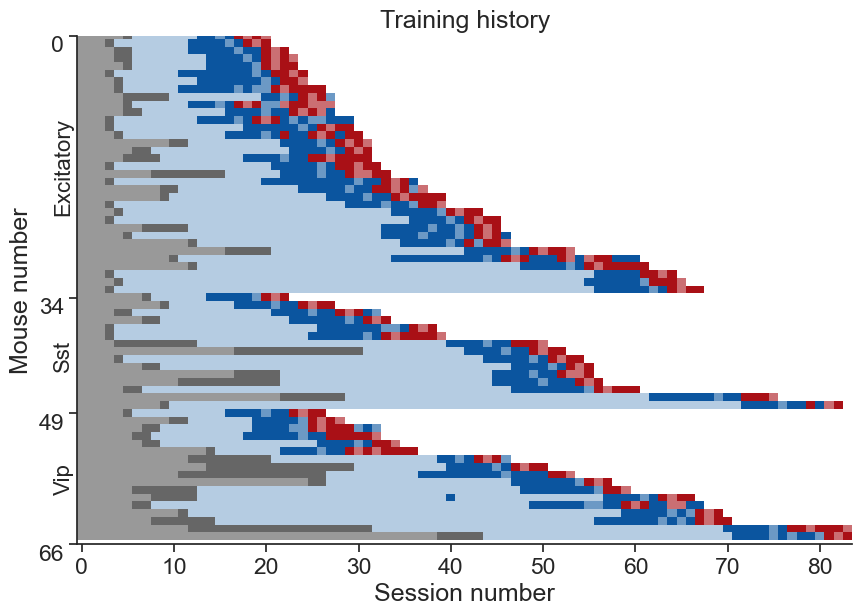

In [123]:
behavior_sessions = utilities.add_behavior_stage_to_behavior_sessions(behavior_sessions)
color_column = 'behavior_stage'
color_map = utils.get_behavior_stage_color_map(as_rgb=True)
ppf.plot_training_history_for_mice(behavior_sessions, color_column=color_column, color_map=color_map, 
                              save_dir=save_dir, folder='training_history', suffix='')

#### Days in each stage

In [ ]:
days_in_stage = behavior_sessions.groupby(['mouse_id', 'behavior_stage']).count().rename(columns={'equipment_name':'days_in_stage'})[['days_in_stage']]
days_in_stage = days_in_stage.reset_index()
days_in_stage = days_in_stage.merge(behavior_sessions[['mouse_id', 'cell_type', 'project_code']], on='mouse_id')
days_in_stage.head()

mouse_id         behavior_stage  days_in_stage       cell_type  \
0    412036  familiar_images_ophys              3  Vip Inhibitory   
1    412036  familiar_images_ophys              3  Vip Inhibitory   
2    412036  familiar_images_ophys              3  Vip Inhibitory   
3    412036  familiar_images_ophys              3  Vip Inhibitory   
4    412036  familiar_images_ophys              3  Vip Inhibitory   

     project_code  
0  VisualBehavior  
1  VisualBehavior  
2  VisualBehavior  
3  VisualBehavior  
4  VisualBehavior

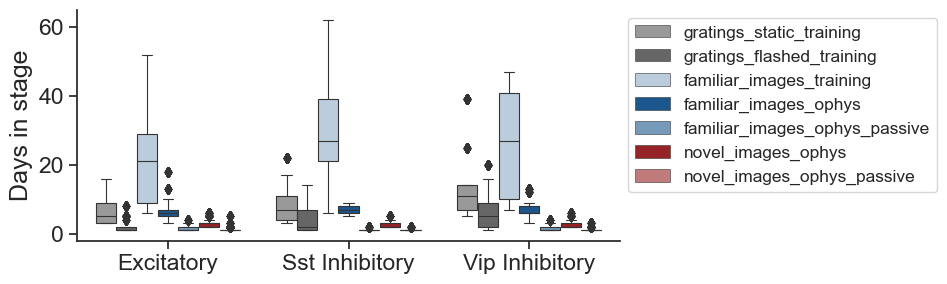

In [ ]:
ppf.plot_days_in_stage(behavior_sessions, 'behavior_stage', save_dir, 'training_history', suffix)

#### Number of sessions prior to ophys sessions included in paper

In [ ]:
paper_ophys_behavior_sessions = behavior_sessions.loc[platform_experiments.behavior_session_id.unique()]
prior_exposures = paper_ophys_behavior_sessions.set_index(['experience_level', 'mouse_id'])[['prior_exposures_to_image_set']].reset_index()

prior_exposures.groupby(['experience_level']).describe()[['prior_exposures_to_image_set']]

prior_exposures_to_image_set                              \
                                        count       mean        std   min   
experience_level                                                            
Familiar                                 68.0  27.264706  14.820939  10.0   
Novel                                    66.0        0.0        0.0   0.0   
Novel +                                  68.0   2.117647   0.922835   1.0   

                                            
                    25%   50%    75%   max  
experience_level                            
Familiar          14.75  22.0  36.25  68.0  
Novel               0.0   0.0    0.0   0.0  
Novel +             2.0   2.0    2.0   6.0

##### All experience levels

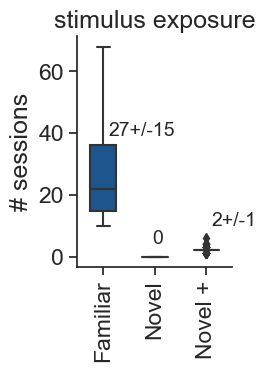

In [381]:
ppf.plot_prior_exposures_to_image_set_before_platform_ophys_sessions(platform_experiments, behavior_sessions, 
                                                                 save_dir=save_dir, folder='training_history', suffix='', ax=None)

##### Prior to Novel session

In [372]:
platform_experiments.experience_level.unique()

array(['Familiar', 'Novel 1', 'Novel >1'], dtype=object)

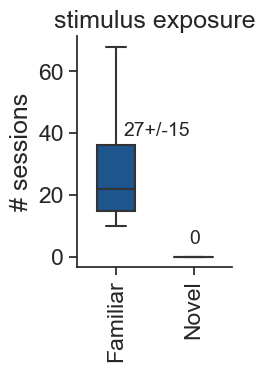

In [380]:
tmp = platform_experiments.copy()
tmp = tmp[tmp.experience_level.isin(['Familiar', 'Novel'])]

ppf.plot_prior_exposures_to_image_set_before_platform_ophys_sessions(tmp, behavior_sessions, 
                                                                 save_dir=save_dir, folder='training_history', suffix='_F_N', ax=None)

#### Number of novel sessions prior to novel + for sessions included in paper

In [ ]:
paper_ophys_behavior_sessions = behavior_sessions.loc[platform_experiments.behavior_session_id.unique()]
paper_ophys_behavior_sessions.keys()

Index(['ophys_session_id', 'ophys_container_id', 'mouse_id', 'indicator',
       'full_genotype', 'driver_line', 'cre_line', 'reporter_line', 'sex',
       'age_in_days', 'imaging_plane_group_count', 'project_code',
       'session_type', 'session_number', 'image_set', 'behavior_type',
       'experience_level', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'date_of_acquisition', 'equipment_name', 'num_depths_per_area',
       'ophys_experiment_id', 'num_targeted_structures', 'engaged_trial_count',
       'false_alarm_trial_count', 'trial_count', 'catch_trial_count',
       'correct_reject_trial_count', 'miss_trial_count', 'go_trial_count',
       'file_id', 'hit_trial_count', 'passive', 'cell_type', 'training_stage',
       'first_day_of_stage', 'last_day_of_stage', 'has_ophys',
       'experiment_phase', 'stimulus', 'first_day_of_stimulus',
       'last_day_of_stimulus', 'stimulus_phase', 'phase', 'stimulus_type',
   

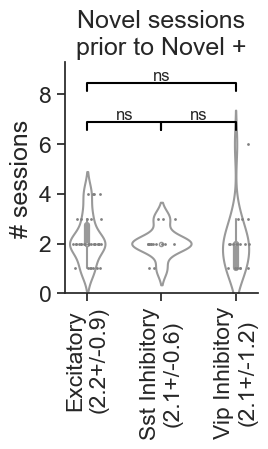

In [ ]:
ppf.plot_prior_exposures_per_cell_type_for_novel_plus(platform_experiments, behavior_sessions, 
                                                  save_dir=save_dir, folder='training_history', suffix='', ax=None)

#### Total exposures for each experience level during ophys

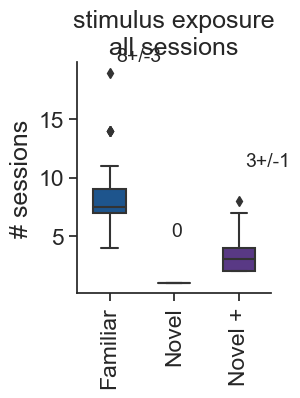

In [ ]:
ppf.plot_total_stimulus_exposures(behavior_sessions, save_dir=save_dir, folder='training_history', suffix='', ax=None)

#### Exposure during training

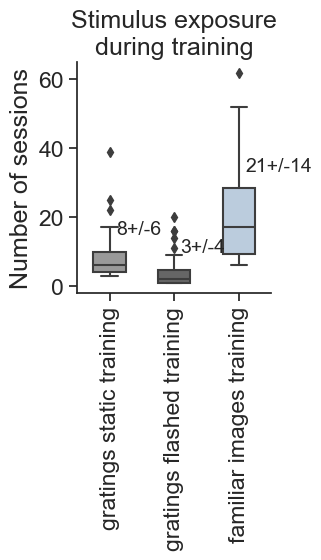

In [ ]:
ppf.plot_stimulus_exposure_prior_to_imaging(behavior_sessions, column_to_group='behavior_stage', 
                                        save_dir=save_dir, folder='training_history', suffix='', ax=None)

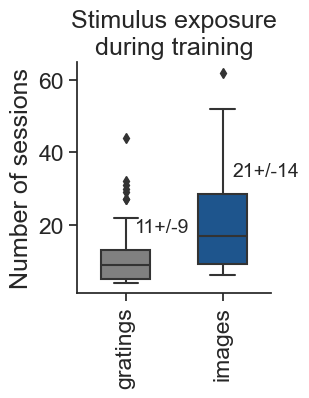

In [ ]:
ppf.plot_stimulus_exposure_prior_to_imaging(behavior_sessions, column_to_group='stimulus_type', 
                                        save_dir=save_dir, folder='training_history', suffix='', ax=None)

### Load behavior performance statistics 

#### AllenSDK computed metrics

In [ ]:
%%time 

method = 'sdk'
engaged_only = False
per_image = False

# folder = get_save_folder(method, engaged_only, per_image)

behavior_session_ids = behavior_sessions.index.values

original_behavior_stats_sdk, problem_sessions = vbu.get_behavior_stats_for_sessions(behavior_session_ids, behavior_sessions, 
                                    method=method, engaged_only=engaged_only, per_image=per_image)

original_behavior_stats = original_behavior_stats_sdk.copy()
behavior_stats_sdk = original_behavior_stats_sdk.merge(behavior_sessions, on='behavior_session_id')
# behavior_stats_sdk['experience_level'] = [utils.convert_experience_level(experience_level) for experience_level in behavior_stats_sdk.experience_level.values]

# print(len(behavior_stats_sdk))

#### Behavior stats for stimulus based metrics, engaged trials only

In [104]:
%%time 

method = 'stimulus_based'
engaged_only = True
per_image = False

# folder = get_save_folder(method, engaged_only, per_image)

behavior_session_ids = behavior_sessions.index.values


original_engaged_behavior_stats_stim, problem_sessions = vbu.get_behavior_stats_for_sessions(behavior_session_ids, behavior_sessions, 
                                    method=method, engaged_only=engaged_only, per_image=per_image)

# original_behavior_stats = behavior_stats.copy()
engaged_behavior_stats_stim = original_engaged_behavior_stats_stim.merge(behavior_sessions, on='behavior_session_id')
print(len(engaged_behavior_stats_stim.mouse_id.unique()))
#  remove 4x2 sessions
engaged_behavior_stats_stim = engaged_behavior_stats_stim[engaged_behavior_stats_stim.project_code!='VisualBehaviorMultiscope4areasx2d']

2445 behavior sessions in behavior_stats table
56
CPU times: total: 15.6 ms
Wall time: 50.7 ms


In [72]:
# which sessions / mice are missing? 
missing_sessions = [bsid for bsid in behavior_sessions.index.values if bsid not in engaged_behavior_stats_stim.behavior_session_id.unique()]
missing_mice= [mouse_id for mouse_id in behavior_sessions.mouse_id.values if mouse_id not in engaged_behavior_stats_stim.mouse_id.unique()]
print(np.sort(np.unique(missing_mice)))

[425496 440631 445002 453911 461946 467954 468866 480753 547266 549976]


### Plot training history for individual mice

old figures can be found here: \\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\platform_paper_plots\figure_1\original\behavior_performance_over_time_stimulus_based

In [73]:
# example_mouse_ids = ['451787', '456917', '485688', '492395', '512458', '533161', 
#                      '546605', '445002', '485688', '489066', '512458', '513626']

example_mouse_ids = [512458, 456917, 485688, 492395, 533161, # 451787 not in platform expts
                     546605, 445002, 485688, 489066, 512458, 513626]

In [74]:
# check whether any of the samples are not in the platform paper eexperiments table
for mouse_id in example_mouse_ids: 
    if len(platform_experiments[platform_experiments.mouse_id==mouse_id])==0: 
        print(mouse_id)

#### Stimulus based behavior metrics

##### Plot metrics for one mouse, one metric

In [75]:
metrics = ['dprime_trial_corrected', 'dprime_non_trial_corrected', 
            'hit_rate', 'fa_rate', 'response_latency_mean', 'response_latency_std']

In [333]:
behavior_stats = engaged_behavior_stats_stim.copy()

In [334]:
behavior_stats.stimulus.unique()

array(['gratings_static', 'gratings_flashed', 'images_A',
       'images_A_habituation', 'images_A_passive', 'images_B',
       'images_B_passive', 'images_B_habituation'], dtype=object)

In [335]:
behavior_stats.behavior_stage.unique()

array(['gratings_static_training', 'gratings_flashed_training',
       'familiar_images_training', 'familiar_images_ophys',
       'familiar_images_ophys_passive', 'novel_images_ophys',
       'novel_images_ophys_passive'], dtype=object)

In [336]:
behavior_stats.stimulus_experience_level.unique()

array(['gratings_static', 'gratings_flashed', 'familiar_images',
       'novel_images'], dtype=object)

<AxesSubplot:title={'center':'512458'}, xlabel='Session number', ylabel='d-prime'>

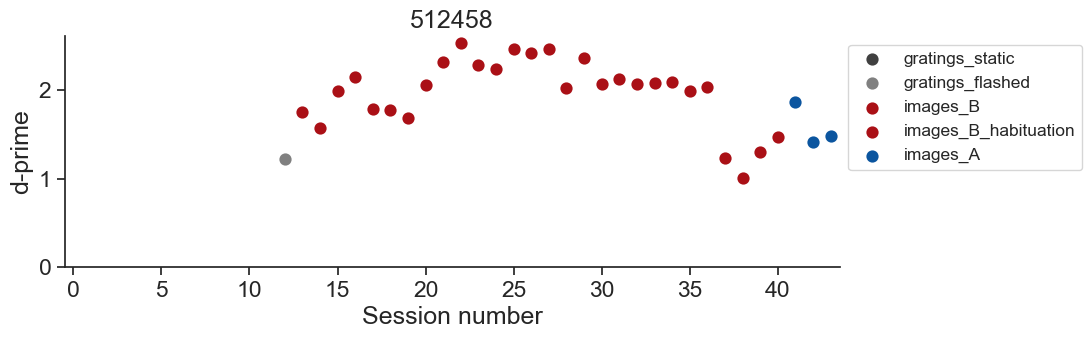

In [109]:
behavior_stats = engaged_behavior_stats_stim.copy()
mouse_id = example_mouse_ids[0]
metric = 'dprime_trial_corrected'
ylabel = 'd-prime'

ppf.plot_behavior_performance_for_one_mouse(behavior_stats, mouse_id, metric, method,
                                        x='date_of_acquisition', hue='stimulus', ylabel=ylabel, 
                                        save_dir=save_dir, folder='behavior_performance', ax=None)

<AxesSubplot:title={'center':'512458'}, xlabel='Session number', ylabel='d-prime'>

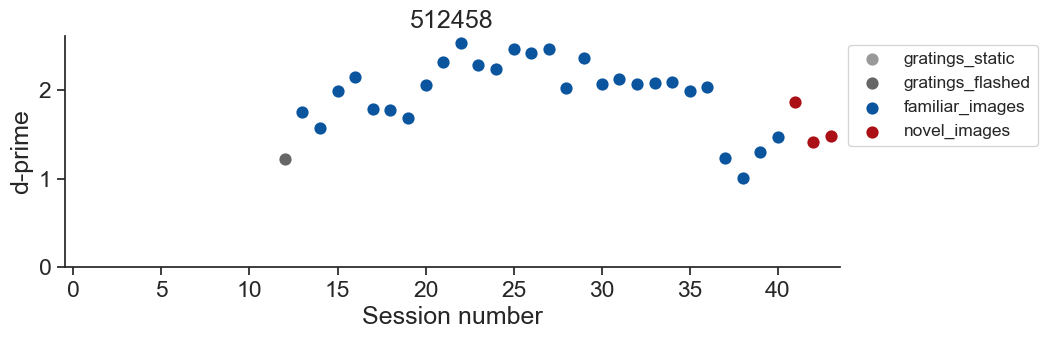

In [124]:
behavior_stats = engaged_behavior_stats_stim.copy()
mouse_id = example_mouse_ids[0]
metric = 'dprime_trial_corrected'
ylabel = 'd-prime'

ppf.plot_behavior_performance_for_one_mouse(behavior_stats, mouse_id, metric, method,
                                        x='date_of_acquisition', hue='stimulus_experience_level', 
                                        use_session_number=True, ylabel=ylabel, 
                                        save_dir=save_dir, folder='behavior_performance', ax=None)

##### Plot performance for multiple metrics, all mice

In [183]:
# behavior_stats = engaged_behavior_stats_stim.copy()
# color_map = utils.get_stimulus_color_map(as_rgb=False)

# metrics = ['dprime_trial_corrected', 'dprime_non_trial_corrected', 'hit_rate', 'fa_rate', 'response_latency_mean', 'response_latency_std']

# for metric in metrics: 
#     for i, mouse_id in enumerate(example_mouse_ids):
#         plot_behavior_performance_for_one_mouse(behavior_stats, mouse_id, metric, method,
#                                                 x='date_of_acquisition', hue='stimulus', ylabel=None, 
#                                                 save_dir=save_dir, folder='behavior_performance', ax=None)

#### Behavior performance across mice - SDK metrics

In [129]:
metrics = ['max_dprime', 'max_dprime_engaged', 
           'mean_dprime', 'mean_dprime_engaged', 
           'mean_hit_rate', 'mean_hit_rate_engaged']

##### Plot for one mouse

<AxesSubplot:title={'center':'512458'}, xlabel='Session number', ylabel='d-prime'>

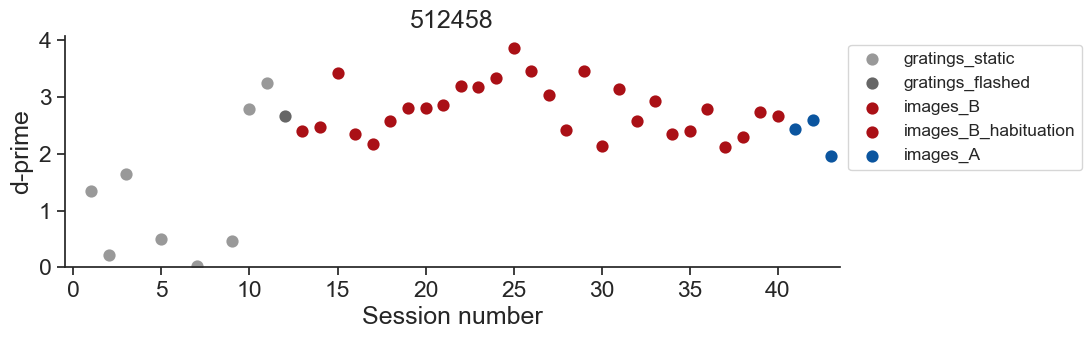

In [130]:
behavior_stats = behavior_stats_sdk.copy()
mouse_id = example_mouse_ids[0]
metric = 'max_dprime'
ylabel = 'd-prime'

ppf.plot_behavior_performance_for_one_mouse(behavior_stats, mouse_id, metric, method,
                                        x='date_of_acquisition', hue='stimulus', ylabel=ylabel, 
                                        save_dir=save_dir, folder='behavior_performance', ax=None)

<AxesSubplot:title={'center':'512458\nExample mouse training history'}, xlabel='Session number', ylabel='d-prime'>

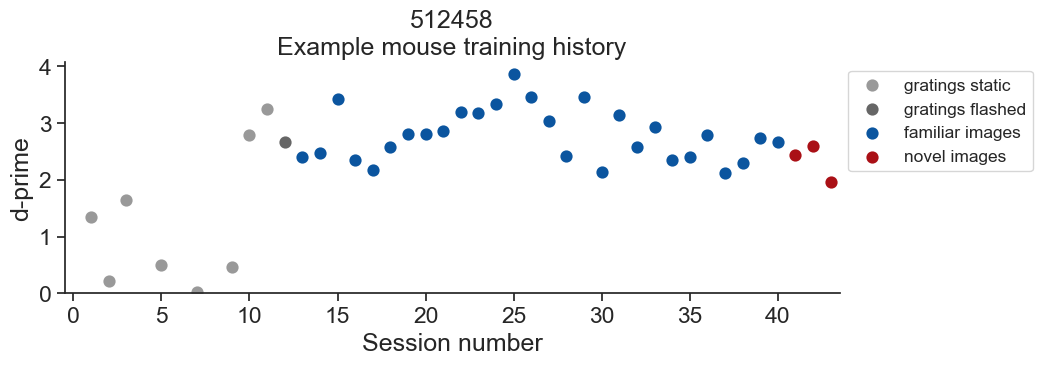

In [148]:
behavior_stats = behavior_stats_sdk.copy()
mouse_id = example_mouse_ids[0]
metric = 'max_dprime'
ylabel = 'd-prime'

ppf.plot_behavior_performance_for_one_mouse(behavior_stats, mouse_id, metric, method,
                                            hue='stimulus_experience_level', use_session_number=True, ylabel=ylabel, 
                                            save_dir=save_dir, folder='behavior_performance', ax=None)

##### Plot for multiple mice and metrics

In [180]:
# behavior_stats = behavior_stats_sdk.copy()
# color_map = utils.get_stimulus_color_map(as_rgb=False)

# metrics = ['max_dprime', 'max_dprime_engaged', 
#            'mean_dprime', 'mean_dprime_engaged', 
#            'mean_hit_rate', 'mean_hit_rate_engaged']

# for metric in metrics: 
#     for i, mouse_id in enumerate(example_mouse_ids):
#         ppf.plot_behavior_performance_for_one_mouse(behavior_stats, mouse_id, metric, method,
#                                             hue='stimulus_experience_level', use_session_number=True, ylabel=ylabel, 
#                                             save_dir=save_dir, folder='behavior_performance', ax=None)

### Plot response probability across conditions 

* get passing ophys sessions, included in platform paper
* load each dataset, annotate stimulus presentations with licks, post-omission, 'could change' etc
* compute summary metrics per session (engaged only and full session) and save

In [27]:
ophys_behavior_sessions = behavior_sessions[(behavior_sessions.session_type.str.contains('OPHYS'))&(behavior_sessions.passive==False)]
print(len(ophys_behavior_sessions))

643


In [29]:
platform_behavior_sessions = behavior_sessions[behavior_sessions.ophys_session_id.isin(platform_experiments.ophys_session_id.unique())]
len(platform_behavior_sessions)

202

#### Calculate for all platform behavior experiments

This is very slow, better to use saved file

In [149]:
# import brain_observatory_utilities.datasets.behavior.data_formatting as behavior_formatting

# stim_save_dir = os.path.join(loading.get_platform_analysis_cache_dir(), 'annotated_stimulus_presentations')

# platform_behavior_stats = pd.DataFrame()
# for behavior_session_id in platform_behavior_sessions.index.values: 

#         print(np.where(platform_behavior_sessions.index.values==behavior_session_id)[0][0], 'out of', len(platform_behavior_sessions))

#         annotated_stim_presentations_path = os.path.join(stim_save_dir, str(behavior_session_id)+'.h5')
        
#         # try to load previously saved annoated stim presentations, if not, generate and save it
#         if os.path.exists(annotated_stim_presentations_path):
#                 stimulus_presentations = pd.read_hdf(annotated_stim_presentations_path, key='df')

#         else:
#                 dataset = cache.get_behavior_session(behavior_session_id)

#                 stimulus_presentations = behavior_formatting.get_annotated_stimulus_presentations(dataset)

#                 # stim_presentations = behavior_formatting.annotate_stimuli(dataset)
#                 # stimulus_presentations = stimulus_presentations.merge(stim_presentations[['could_change', 'previous_image_name', 'response_lick']], on='stimulus_presentations_id')

#                 stimulus_presentations.to_hdf(annotated_stim_presentations_path, key='df')

#         try: # compute stats from annotated stim presentations and add to table for all sessions
#                 # this function limits metrics calciulation to engaged periods (stim_presentations['engaged]=True)
#                 behavior_stats = loading.get_behavior_stats_from_stimulus_presentations(stimulus_presentations)
#                 behavior_stats['behavior_session_id'] = behavior_session_id

#                 platform_behavior_stats = pd.concat([platform_behavior_stats, behavior_stats])
#         except: 
#                 print('behavior stats not added for', behavior_session_id)

# # platform_behavior_stats.to_csv(os.path.join(save_dir, 'platform_behavior_stats_engaged.csv'))


In [156]:
platform_behavior_stats = pd.read_csv(os.path.join(cache_dir, 'behavior_performance', 'platform_behavior_stats_engaged.csv'), index_col=0)


#### Plot response probability for different stimulus presentation conditions - changes, non-changes, omissions, post-omissions

(-0.01, 1.0)

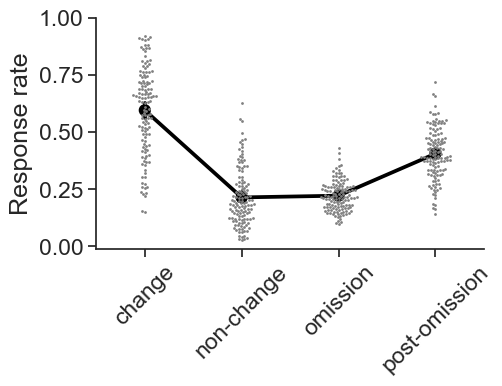

In [158]:
data = platform_behavior_stats.copy()
data = data[data.fraction_engaged>0.7]
data = data[data.trial_type.isin(['change', 'could_change', 'omission', 'post-omission'])]
data['trial_type'] = ['non-change' if trial_type == 'could_change' else trial_type for trial_type in data.trial_type.values]

trial_types = data.trial_type.unique()
figsize = (5,3)
fig, ax = plt.subplots(figsize=figsize)
ax = sns.pointplot(data=data, x='trial_type', y='response_probability', 
                   order=trial_types, color='k', ax=ax)
ax = sns.swarmplot(data=data, x='trial_type', y='response_probability', 
                   order=trial_types, color='gray', s=2, ax=ax)
ax.set_ylabel('Response rate')
ax.set_xticklabels(trial_types, rotation=45)
ax.set_xlabel('')
ax.set_ylim(-0.01, 1)

#### Plot response rate for go and catch trials

##### Stimulus based metric calculation

In [171]:
# stats = engaged_behavior_stats_stim[engaged_behavior_stats_stim.behavior_session_id.isin(platform_experiments.behavior_session_id.unique())]
stats = engaged_behavior_stats_stim.copy()

stats = stats[['hit_rate', 'fa_rate', 'behavior_session_id']].melt(id_vars='behavior_session_id')
stats['response_probability'] = stats['value']
stats['trial_type'] = stats['variable']
stats['trial_type'] = [trial_type.split('_')[0] for trial_type in stats.trial_type.values]

stats.head()

behavior_session_id  variable  value  response_probability trial_type
0            760808911  hit_rate    NaN                   NaN        hit
1            761294708  hit_rate    NaN                   NaN        hit
2            761730617  hit_rate    NaN                   NaN        hit
3            762067130  hit_rate    NaN                   NaN        hit
4            762418364  hit_rate    NaN                   NaN        hit

In [172]:
stats = stats.merge(behavior_sessions[['mouse_id', 'experience_level', 'cell_type', 'session_type']], on='behavior_session_id')
stats.head()

behavior_session_id  variable  value  response_probability trial_type  \
0            760808911  hit_rate    NaN                   NaN        hit   
1            760808911   fa_rate    NaN                   NaN         fa   
2            761294708  hit_rate    NaN                   NaN        hit   
3            761294708   fa_rate    NaN                   NaN         fa   
4            761730617  hit_rate    NaN                   NaN        hit   

   mouse_id experience_level       cell_type  \
0    412036         Training  Vip Inhibitory   
1    412036         Training  Vip Inhibitory   
2    412036         Training  Vip Inhibitory   
3    412036         Training  Vip Inhibitory   
4    412036         Training  Vip Inhibitory   

                            session_type  
0  TRAINING_0_gratings_autorewards_15min  
1  TRAINING_0_gratings_autorewards_15min  
2                    TRAINING_1_gratings  
3                    TRAINING_1_gratings  
4                    TRAINING_1_gratings

c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(-0.01, 1.0)

c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


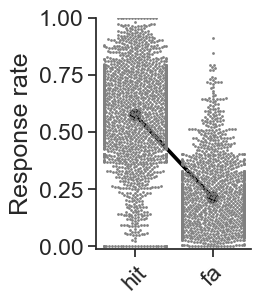

In [173]:
# platform ophys sessions
data = stats.copy()
data = data[data.behavior_session_id.isin(platform_behavior_sessions.index.values)]

trial_types = data.trial_type.unique()
figsize = (2, 3)
fig, ax = plt.subplots(figsize=figsize)
ax = sns.pointplot(data=data, x='trial_type', y='response_probability', 
                   order=trial_types, color='k', ax=ax)
ax = sns.swarmplot(data=data, x='trial_type', y='response_probability', 
                   order=trial_types, color='gray', s=2, ax=ax)
ax.set_ylabel('Response rate')
ax.set_xticklabels(trial_types, rotation=45)
ax.set_xlabel('')
ax.set_ylim(-0.01, 1)

(-0.01, 1.0)

c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


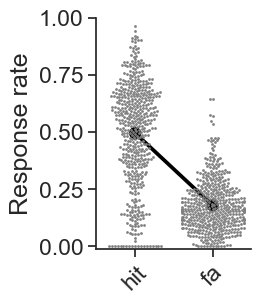

In [174]:
# ophys sessions
data = stats.copy()
data = data[data.session_type.str.contains('OPHYS')]

trial_types = data.trial_type.unique()
figsize = (2, 3)
fig, ax = plt.subplots(figsize=figsize)
ax = sns.pointplot(data=data, x='trial_type', y='response_probability', 
                   order=trial_types, color='k', ax=ax)
ax = sns.swarmplot(data=data, x='trial_type', y='response_probability', 
                   order=trial_types, color='gray', s=2, ax=ax)
ax.set_ylabel('Response rate')
ax.set_xticklabels(trial_types, rotation=45)
ax.set_xlabel('')
ax.set_ylim(-0.01, 1)

c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(-0.01, 1.0)

c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


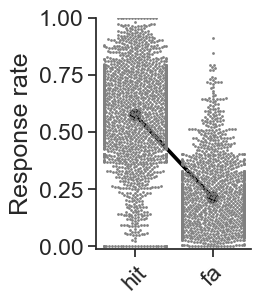

In [175]:
# full dataset
data = stats.copy()

trial_types = data.trial_type.unique()
figsize = (2, 3)
fig, ax = plt.subplots(figsize=figsize)
ax = sns.pointplot(data=data, x='trial_type', y='response_probability', 
                   order=trial_types, color='k', ax=ax)
ax = sns.swarmplot(data=data, x='trial_type', y='response_probability', 
                   order=trial_types, color='gray', s=2, ax=ax)
ax.set_ylabel('Response rate')
ax.set_xticklabels(trial_types, rotation=45)
ax.set_xlabel('')
ax.set_ylim(-0.01, 1)

##### Using AllenSDK performance metrics

In [229]:
# stats = engaged_behavior_stats_stim[engaged_behavior_stats_stim.behavior_session_id.isin(platform_experiments.behavior_session_id.unique())]
stats = behavior_stats_sdk.copy()

stats = stats[['mean_hit_rate_engaged', 'mean_false_alarm_rate_engaged', 'behavior_session_id']].melt(id_vars='behavior_session_id')
stats['response_probability'] = stats['value']
stats['trial_type'] = stats['variable']
stats['trial_type'] = ['change' if 'hit' in trial_type else 'non-change' for trial_type in stats.trial_type.values]

stats = stats.merge(behavior_sessions[['mouse_id', 'experience_level', 'cell_type', 'session_type']], on='behavior_session_id')
stats.head()

behavior_session_id                       variable     value  \
0            760808911          mean_hit_rate_engaged       NaN   
1            760808911  mean_false_alarm_rate_engaged       NaN   
2            761294708          mean_hit_rate_engaged  0.382323   
3            761294708  mean_false_alarm_rate_engaged  0.468123   
4            761730617          mean_hit_rate_engaged  0.681158   

   response_probability  trial_type  mouse_id experience_level  \
0                   NaN      change    412036         Training   
1                   NaN  non-change    412036         Training   
2              0.382323      change    412036         Training   
3              0.468123  non-change    412036         Training   
4              0.681158      change    412036         Training   

        cell_type                           session_type  
0  Vip Inhibitory  TRAINING_0_gratings_autorewards_15min  
1  Vip Inhibitory  TRAINING_0_gratings_autorewards_15min  
2  Vip Inhibitory                    TRAINING_1_gratings  
3  Vip Inhibitory                    TRAINING_1_gratings  
4  Vip Inhibitory                    TRAINING_1_gratings

c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

<AxesSubplot:ylabel='Response rate'>

c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


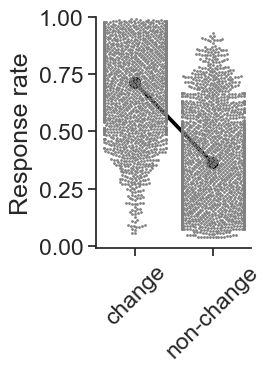

In [231]:
# platform ophys sessions
data = stats.copy()
data = data[data.behavior_session_id.isin(platform_behavior_sessions.index.values)]

suffix = '_sdk_platform_behavior_sessions'

plot_response_rate_trial_types(data, save_dir=save_dir, suffix=suffix, ax=None)


<AxesSubplot:ylabel='Response rate'>

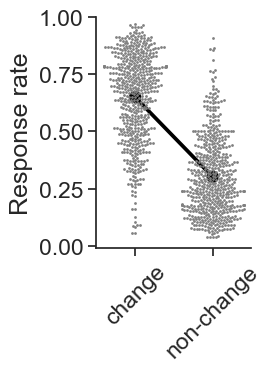

In [232]:

# all ophys sessions
data = stats.copy()
data = data[data.session_type.str.contains('OPHYS')]

suffix = '_sdk_platform_ophys_sessions'

plot_response_rate_trial_types(data, save_dir=save_dir, suffix=suffix, ax=None)


c:\Users\marinag\Anaconda3\envs\visual_behavior_sdk_new\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Response rate'>

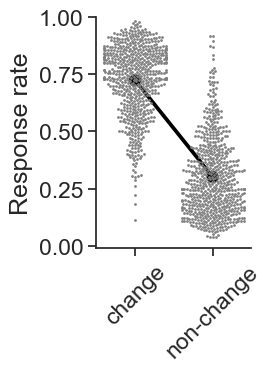

In [233]:
# handoff ready sessions
data = stats.copy()
data = data[data.session_type.str.contains('handoff_ready')]


suffix = '_sdk_handoff_ready'

plot_response_rate_trial_types(data, save_dir=save_dir, suffix=suffix, ax=None)


### Plot d-prime across conditions

#### AllenSDK metrics

saving_stats


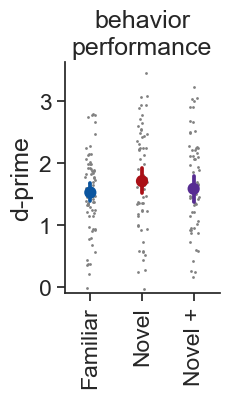

In [239]:
# only data in physiology dataset
metric = 'max_dprime'

# metrics = ['mean_dprime_engaged', 'max_dprime_engaged',
#         'mean_hit_rate_engaged', 'mean_false_alarm_rate_engaged']

stats = behavior_stats_sdk.copy()

stats = stats[stats.behavior_session_id.isin(platform_experiments.behavior_session_id.unique())]
# stats = stats[(stats.experience_level.isin(['Familiar', 'Novel']))]


suffix = '_sdk_platform_experiments'

ppf.plot_behavior_metric_by_experience(stats, metric, title='behavior\nperformance', ylabel='d-prime', ylims=[-0.1, 3.3],
                                       best_image=False, show_containers=False, plot_stats=True, stripplot=True, show_ns=False,
                                       save_dir=save_dir, folder='behavior_metrics', suffix=suffix)

saving_stats


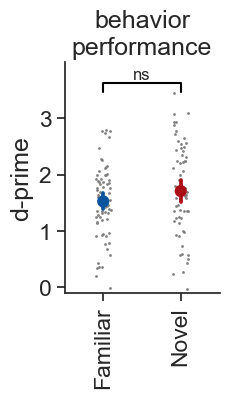

In [240]:
# only data in physiology dataset
metric = 'max_dprime'

# metrics = ['mean_dprime_engaged', 'max_dprime_engaged',
#         'mean_hit_rate_engaged', 'mean_false_alarm_rate_engaged']

stats = behavior_stats_sdk.copy()

stats = stats[stats.behavior_session_id.isin(platform_experiments.behavior_session_id.unique())]
stats = stats[(stats.experience_level.isin(['Familiar', 'Novel']))]


suffix = '_sdk_platform_experiments_F_N'

ppf.plot_behavior_metric_by_experience(stats, metric, title='behavior\nperformance', ylabel='d-prime', ylims=[-0.1, 3.3],
                                       best_image=False, show_containers=False, plot_stats=True, stripplot=True, show_ns=True,
                                       save_dir=save_dir, folder='behavior_metrics', suffix=suffix)

saving_stats


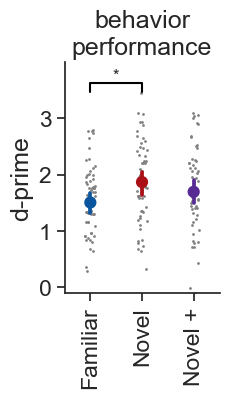

In [247]:
metric = 'max_dprime_engaged'
# only data in physiology dataset

stats = behavior_stats_sdk.copy()

stats = stats[stats.behavior_session_id.isin(platform_experiments.behavior_session_id.unique())]
# stats = stats[(stats.experience_level.isin(['Familiar', 'Novel']))]


suffix = '_sdk_platform_experiments'

ppf.plot_behavior_metric_by_experience(stats, metric, title='behavior\nperformance', ylabel='d-prime', ylims=[-0.1, 3.3],
                                       best_image=False, show_containers=False, plot_stats=True, stripplot=True, show_ns=False,
                                       save_dir=save_dir, folder='behavior_metrics', suffix=suffix)

saving_stats


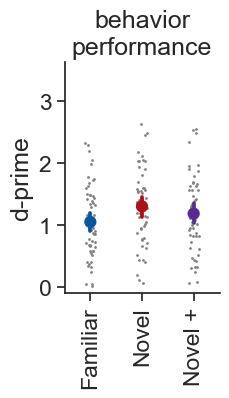

In [248]:
metric = 'mean_dprime_engaged'

# metrics = ['mean_dprime_engaged', 'max_dprime_engaged',
#         'mean_hit_rate_engaged', 'mean_false_alarm_rate_engaged']

stats = behavior_stats_sdk.copy()
stats = stats[stats[metric]>0]
stats = stats[stats.behavior_session_id.isin(platform_experiments.behavior_session_id.unique())]

suffix = '_sdk_platform_experiments'

ppf.plot_behavior_metric_by_experience(stats, metric, title='behavior\nperformance', ylabel='d-prime', ylims=[-0.1, 3.3],
                                       best_image=False, show_containers=False, plot_stats=True, stripplot=True, show_ns=False,
                                       save_dir=save_dir, folder='behavior_metrics', suffix=suffix)

### Plot behavior performance across cohorts

In [613]:
len(stats.mouse_id.unique())

63

In [614]:
len(platform_experiments.mouse_id.unique())

66

#### SDK metrics

saving_stats
saving_stats
saving_stats


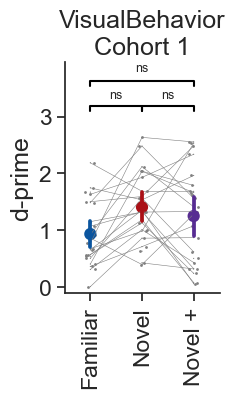

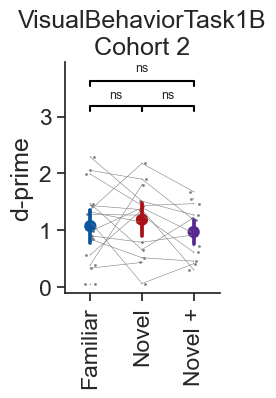

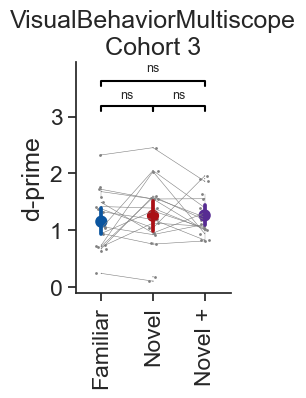

In [615]:
metric = 'mean_dprime_engaged'

# metrics = ['mean_dprime_engaged', 'max_dprime_engaged',
#         'mean_hit_rate_engaged', 'mean_false_alarm_rate_engaged']

stats = behavior_stats_sdk.copy()
stats = stats[stats[metric]>0]
stats = stats[stats.behavior_session_id.isin(platform_experiments.behavior_session_id.unique())]
# turn ophys_container_id to mouse_id so that across mouse / container plotting works
stats['ophys_container_id'] = stats['mouse_id']


suffix = '_sdk_platform_experiments'

project_codes = ['VisualBehavior', 'VisualBehaviorTask1B', 'VisualBehaviorMultiscope']

for i, project_code in enumerate(project_codes): 
    title = project_code+'\nCohort '+str(i+1)
    tmp = stats[stats.project_code==project_code]

    suffix = '_sdk_'+project_code

    ppf.plot_behavior_metric_by_experience(tmp, metric, title=title, ylabel='d-prime', ylims=[-0.1, 3],
                                        best_image=False, show_containers=True, plot_stats=True, stripplot=True, show_ns=True,
                                        save_dir=save_dir, folder='behavior_metrics', suffix=suffix)

##### By cell class

saving_stats
stats did not save for mean_dprime_engaged
saving_stats
stats did not save for mean_dprime_engaged
saving_stats
stats did not save for mean_dprime_engaged
saving_stats
stats did not save for mean_dprime_engaged
saving_stats
stats did not save for mean_dprime_engaged
saving_stats
stats did not save for mean_dprime_engaged
saving_stats
stats did not save for mean_dprime_engaged
saving_stats
stats did not save for mean_dprime_engaged
saving_stats
stats did not save for mean_dprime_engaged


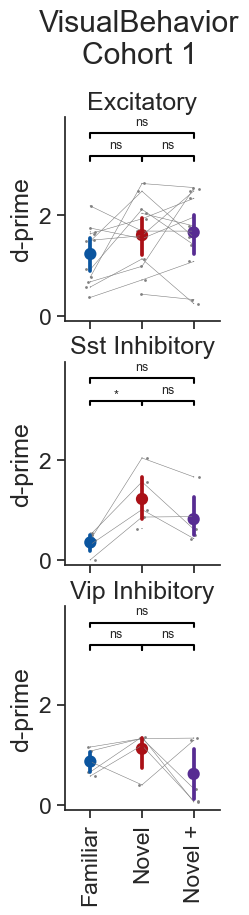

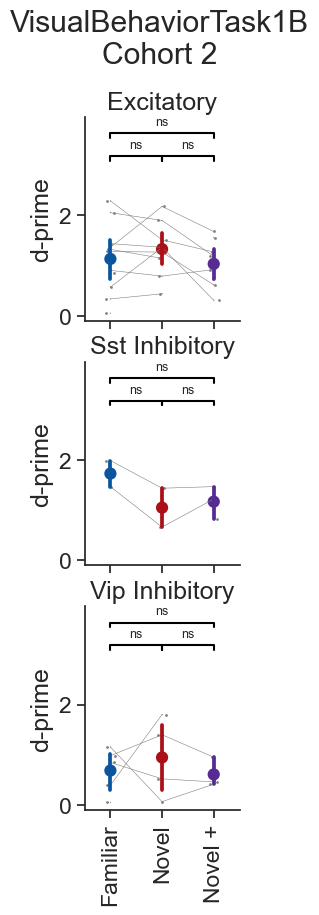

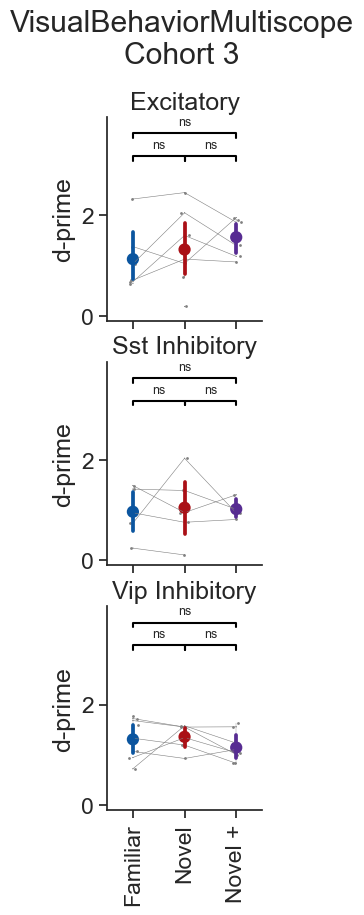

In [616]:
metric = 'mean_dprime_engaged'

# metrics = ['mean_dprime_engaged', 'max_dprime_engaged',
#         'mean_hit_rate_engaged', 'mean_false_alarm_rate_engaged']

stats = behavior_stats_sdk.copy()
stats = stats[stats[metric]>0]
stats = stats[stats.behavior_session_id.isin(platform_experiments.behavior_session_id.unique())]
# turn ophys_container_id to mouse_id so that across mouse / container plotting works
stats['ophys_container_id'] = stats['mouse_id']


suffix = '_sdk_platform_experiments'

project_codes = ['VisualBehavior', 'VisualBehaviorTask1B', 'VisualBehaviorMultiscope']

for p, project_code in enumerate(project_codes): 
    suptitle = project_code+'\nCohort '+str(p+1)
    tmp = stats[stats.project_code==project_code]

    suffix = '_sdk_'+project_code+'_by_cell_class'

    figsize = (2, 9)
    fig, ax = plt.subplots(3, 1, figsize=figsize, sharex=True, sharey=False)
    # stats dataframe to save
    cell_types = utils.get_cell_types()
    for i, cell_type in enumerate(cell_types):
        ct_data = tmp[tmp.cell_type == cell_type]

        ax[i] = ppf.plot_behavior_metric_by_experience(ct_data, metric, title=cell_type, ylabel='d-prime', ylims=[-0.1, 3],
                                        best_image=False, show_containers=True, plot_stats=True, stripplot=True, show_ns=True,
                                        save_dir=None, folder='behavior_metrics', suffix=suffix, ax=ax[i])
    plt.suptitle(suptitle, x=0.5, y=1)
    if save_dir:
        utils.save_figure(fig, figsize, save_dir, 'behavior_metrics', metric + suffix)


#### Stim based metrics

In [618]:
engaged_behavior_stats_stim.keys()

Index(['index', 'behavior_session_id', 'response_latency_count',
       'response_latency_mean', 'response_latency_std', 'response_latency_min',
       'response_latency_25%', 'response_latency_50%', 'response_latency_75%',
       'response_latency_max', 'hit_rate', 'fa_rate',
       'number_of_engaged_go_trials', 'number_of_engaged_hits',
       'number_of_engaged_catch_trials', 'number_of_engaged_false_alarms',
       'fraction_engaged', 'dprime_trial_corrected',
       'dprime_non_trial_corrected', 'ophys_session_id', 'ophys_container_id',
       'mouse_id', 'indicator', 'full_genotype', 'driver_line', 'cre_line',
       'reporter_line', 'sex', 'age_in_days', 'imaging_plane_group_count',
       'project_code', 'session_type', 'session_number', 'image_set',
       'behavior_type', 'experience_level', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'date_of_acquisition', 'equipment_name', 'num_depths_per_area',
       'o

saving_stats
saving_stats
saving_stats


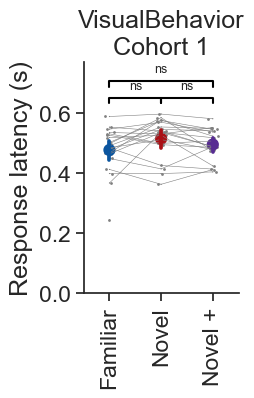

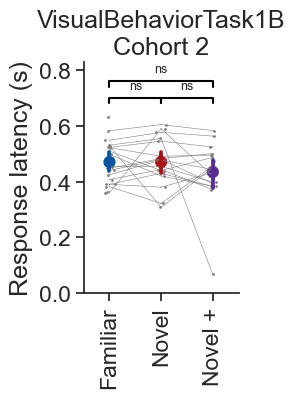

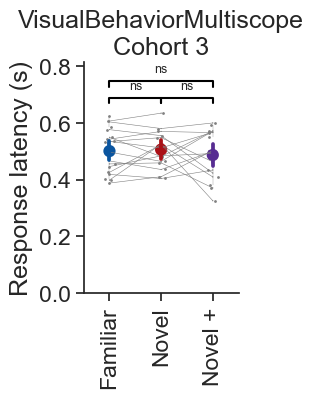

In [621]:
metric = 'response_latency_mean'

# metrics = ['response_latency_mean', 'fraction_engaged',
#         'dprime_trial_corrected', 'hit_rate']

stats = engaged_behavior_stats_stim.copy()
stats = stats[stats.behavior_session_id.isin(platform_experiments.behavior_session_id.unique())]

# turn ophys_container_id to mouse_id so that across mouse / container plotting works
stats['ophys_container_id'] = stats['mouse_id']


project_codes = ['VisualBehavior', 'VisualBehaviorTask1B', 'VisualBehaviorMultiscope']

for i, project_code in enumerate(project_codes): 
    title = project_code+'\nCohort '+str(i+1)
    tmp = stats[stats.project_code==project_code]

    suffix = '_stim_based_'+project_code

    ppf.plot_behavior_metric_by_experience(tmp, metric, title=title, ylabel='Response latency (s)', ylims=None,
                                        best_image=False, show_containers=True, plot_stats=True, stripplot=True, show_ns=True,
                                        save_dir=save_dir, folder='behavior_metrics', suffix=suffix)

##### All SDK metrics

In [265]:
# sdk_metrics = ['mean_dprime', 'max_dprime', 'mean_dprime_engaged', 'max_dprime_engaged',
#         'mean_hit_rate_engaged', 'mean_false_alarm_rate_engaged', 'engaged_trial_count_x']

# stats = behavior_stats_sdk.copy()

# stats = stats[stats.behavior_session_id.isin(platform_experiments.behavior_session_id.unique())]

# suffix = '_sdk_platform_experiments'

# for metric in sdk_metrics:
#     ppf.plot_behavior_metric_by_experience(stats, metric, title='', ylabel=None, ylims=None,
#                                         best_image=False, show_containers=False, plot_stats=True, stripplot=True, show_ns=False,
#                                         save_dir=save_dir, folder='behavior_metrics', suffix=suffix)

#### Stimulus based metric calculation

saving_stats


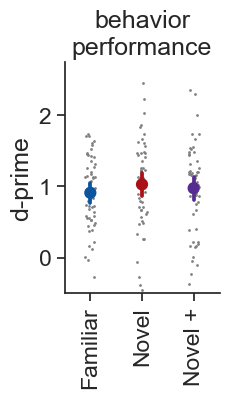

In [255]:
metric = 'dprime_trial_corrected'

stats = engaged_behavior_stats_stim.copy()
stats = stats[stats.behavior_session_id.isin(platform_experiments.behavior_session_id.unique())]

suffix = '_stim_based_platform_ophys_experiments'

ppf.plot_behavior_metric_by_experience(stats, metric, title='behavior\nperformance', ylabel='d-prime', ylims=[-0.5, 2.5],
                                       best_image=False, show_containers=False, plot_stats=True,
                                       save_dir=save_dir, folder='behavior_metrics', suffix=suffix)

##### All metrics for stim based

In [266]:
# stim_based_metrics = ['response_latency_mean', 'hit_rate', 'fa_rate',
#          'fraction_engaged', 'dprime_trial_corrected','dprime_non_trial_corrected']

# stats = engaged_behavior_stats_stim.copy()
# stats = stats[stats.behavior_session_id.isin(platform_experiments.behavior_session_id.unique())]

# suffix = '_stim_based_platform_ophys_experiments'

# for metric in stim_based_metrics: 
#     ppf.plot_behavior_metric_by_experience(stats, metric, title='', ylabel=None, ylims=None,
#                                         best_image=False, show_containers=False, plot_stats=True,
#                                         save_dir=save_dir, folder='behavior_metrics', suffix=suffix)

### Plot performace across training stages

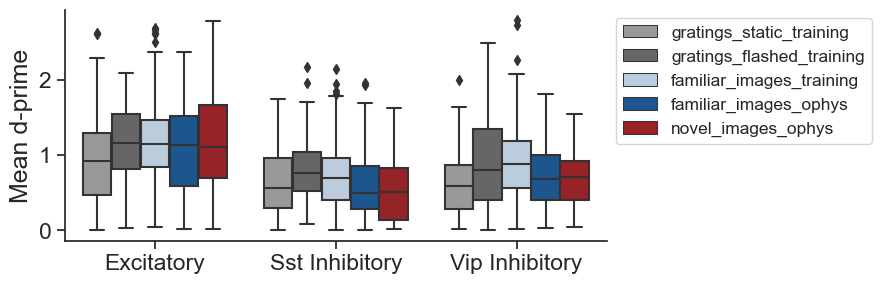

In [322]:
# mean d-prime
data = behavior_stats_sdk.copy()
metric = 'mean_dprime'
data = data[data[metric]>0]

ppf.plot_behavior_metric_across_stages(data, metric, ylabel='Mean d-prime', save_dir=save_dir, folder='behavior_metrics', suffix='_sdk')

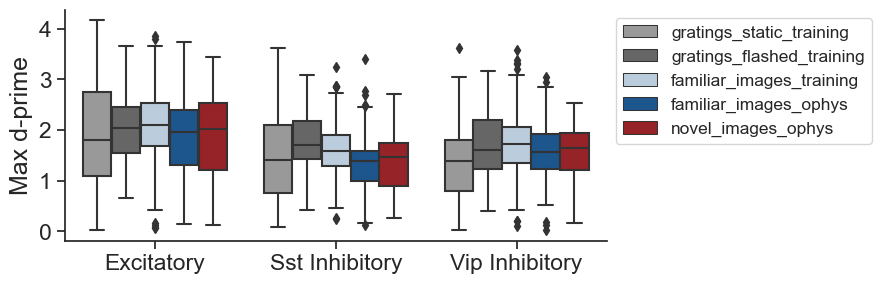

In [329]:
data = behavior_stats_sdk.copy()
metric = 'max_dprime'
data = data[data[metric]>0]

ppf.plot_behavior_metric_across_stages(data, metric, ylabel='Max d-prime', 
                                       save_dir=save_dir, folder='behavior_metrics', suffix='_sdk')

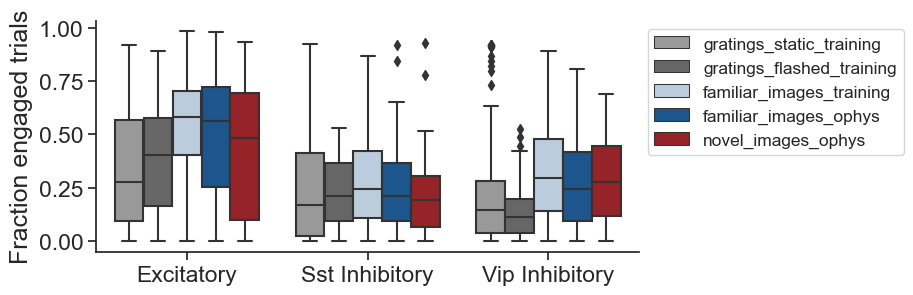

In [326]:
# fraction trials engaged

behavior_stats_sdk['fraction_trials_engaged'] = behavior_stats_sdk.engaged_trial_count_x / behavior_stats_sdk.trial_count_x

data = behavior_stats_sdk.copy()

metric = 'fraction_trials_engaged'

ppf.plot_behavior_metric_across_stages(data, metric, ylabel='Fraction engaged trials', 
                                       save_dir=save_dir, folder='behavior_metrics', suffix='_sdk')

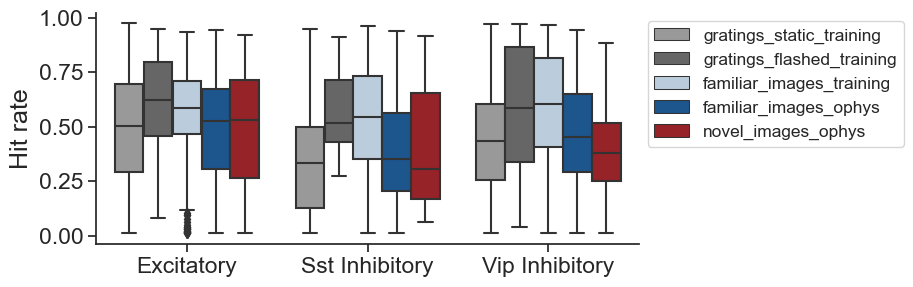

In [327]:
# hit rate

data = behavior_stats_sdk.copy()
metric = 'mean_hit_rate'

ppf.plot_behavior_metric_across_stages(data, metric, ylabel='Hit rate', save_dir=save_dir, folder='behavior_metrics', suffix='_sdk')

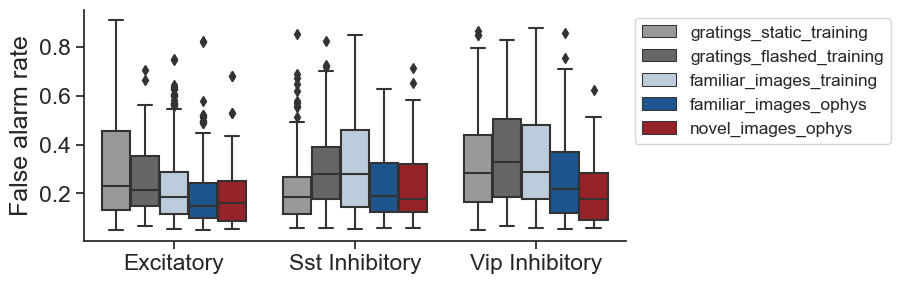

In [328]:
# False alarm rate

data = behavior_stats_sdk.copy()
metric = 'mean_false_alarm_rate'

ppf.plot_behavior_metric_across_stages(data, metric, ylabel='False alarm rate', save_dir=save_dir, folder='behavior_metrics', suffix='_sdk')

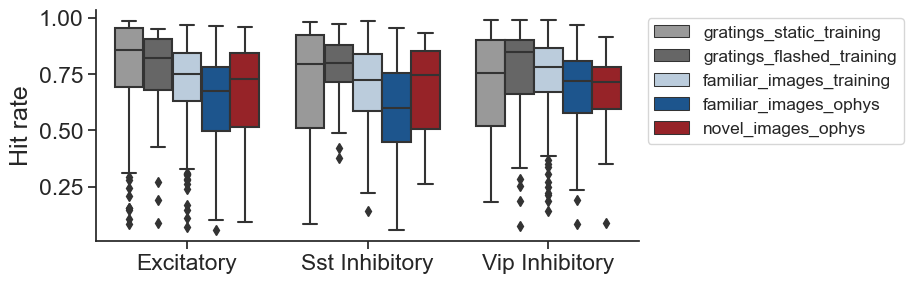

In [330]:
# Hit rate engaged

data = behavior_stats_sdk.copy()
metric = 'mean_hit_rate_engaged'

ppf.plot_behavior_metric_across_stages(data, metric, ylabel='Hit rate', 
                                   save_dir=save_dir, folder='behavior_metrics', suffix='_sdk_engaged')

### Plot familiar and novel images 

#### Images without experience colors

c:\users\marinag\documents\code\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


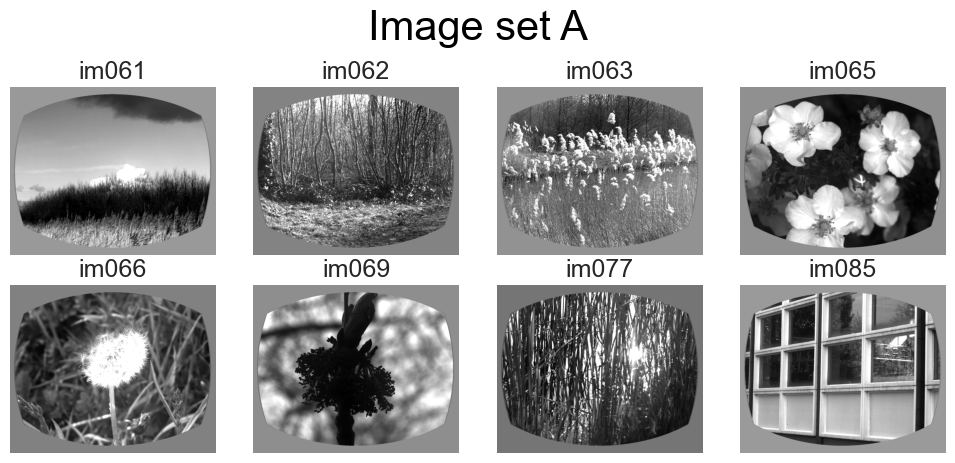

In [360]:

# familiar 
familiar_experiment_id = platform_experiments[(platform_experiments.project_code=='VisualBehavior')&
                                        (platform_experiments.experience_level=='Familiar')].index.values[0]
dataset = loading.get_ophys_dataset(familiar_experiment_id)

stimulus_templates = dataset.stimulus_templates.copy()

fig, ax = plt.subplots(2,4,figsize=(10,5))
ax=ax.ravel()
for i,image_name in enumerate(np.sort(stimulus_templates.index)):
    image = stimulus_templates.loc[image_name]['unwarped'].copy()
    image[np.isnan(image)] = 150
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title(image_name,)
    ax[i].set_xlim(350, 1575)
    ax[i].set_ylim(100, 1100)
    ax[i].invert_yaxis()
    ax[i].axis('off')
    
# fig.suptitle('Familiar Training Set\nimage set A', color=colors[0])
fig.suptitle('Image set A', x=0.5, y=0.94,  color='k', fontsize=30)
plt.subplots_adjust(hspace=0.4, wspace=0.2)
fig.tight_layout()

c:\users\marinag\documents\code\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


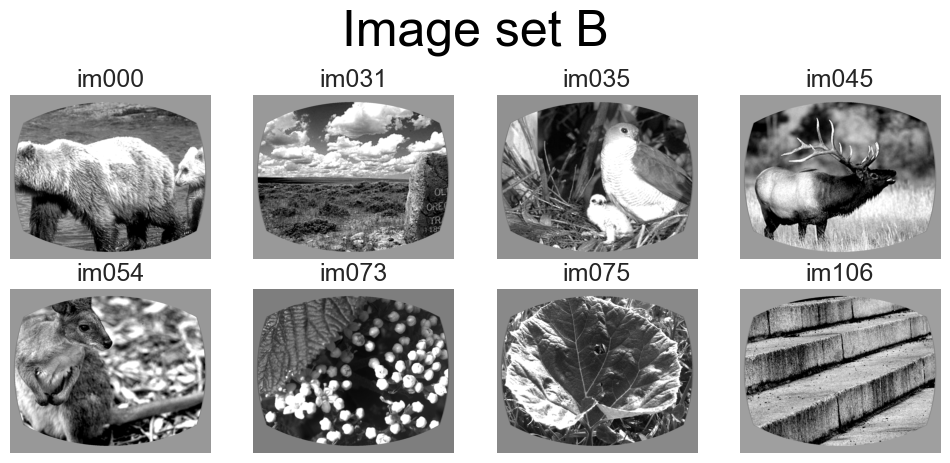

In [359]:

# novel 
novel_experiment_id = platform_experiments[(platform_experiments.project_code=='VisualBehavior')&
                                           (platform_experiments.experience_level=='Novel 1')].index.values[0]
dataset = loading.get_ophys_dataset(novel_experiment_id)

stimulus_templates = dataset.stimulus_templates.copy()

fig, ax = plt.subplots(2,4,figsize=(10,5))
ax=ax.ravel()
for i,image_name in enumerate(np.sort(stimulus_templates.index)):
    image = stimulus_templates.loc[image_name]['unwarped'].copy()
    image[np.isnan(image)] = 150
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title(image_name,)
    ax[i].set_xlim(350, 1575)
    ax[i].set_ylim(100, 1100)
    ax[i].invert_yaxis()
    ax[i].axis('off')
    
# fig.suptitle('Familiar Training Set\nimage set A', color=colors[0])
fig.suptitle('Image set B', x=0.5, y=0.94,  color='k', fontsize=36)
plt.subplots_adjust(hspace=0.4, wspace=0.2)
fig.tight_layout()

#### With experience colors

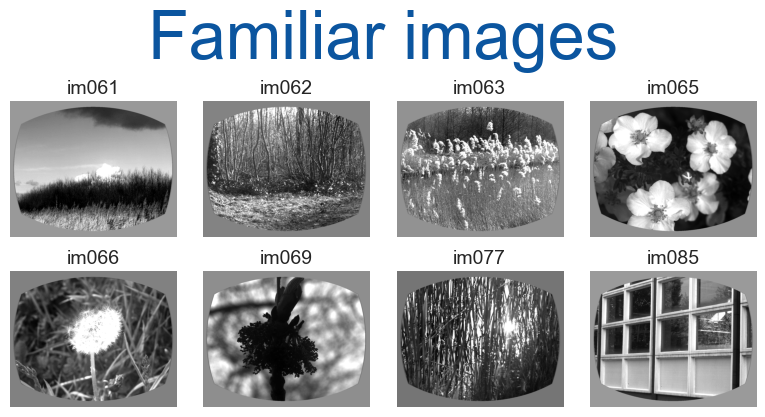

In [368]:
# familiar 
familiar_experiment_id = platform_experiments[(platform_experiments.project_code=='VisualBehavior')&
                                        (platform_experiments.experience_level=='Familiar')].index.values[0]
dataset = loading.get_ophys_dataset(familiar_experiment_id)

stimulus_templates = dataset.stimulus_templates.copy()

fig, ax = plt.subplots(2,4,figsize=(8,5))
ax=ax.ravel()
for i,image_name in enumerate(np.sort(stimulus_templates.index)):
    image = stimulus_templates.loc[image_name]['unwarped'].copy()
    image[np.isnan(image)] = 150
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title(image_name, fontsize=14)
    ax[i].set_xlim(350, 1575)
    ax[i].set_ylim(100, 1100)
    ax[i].invert_yaxis()
    ax[i].axis('off')
    
# fig.suptitle('Familiar Training Set\nimage set A', color=colors[0])
fig.suptitle('Familiar images', x=0.5, y=0.9,  color=colors[0], fontsize=48)
plt.subplots_adjust(hspace=0.1, wspace=0.1)
fig.tight_layout()

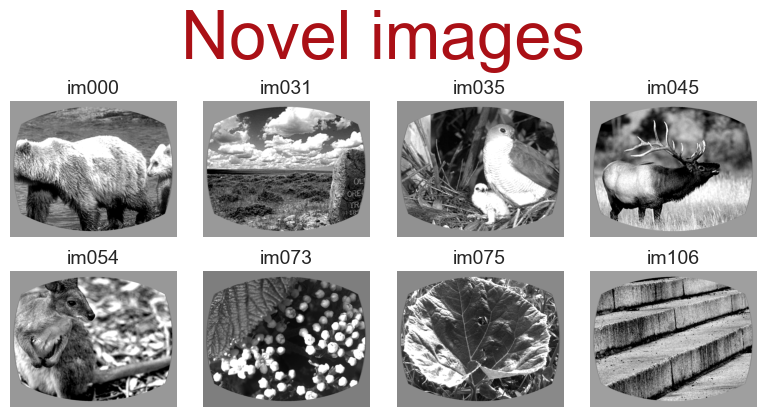

In [370]:
# for A/B

# novel 
novel_experiment_id = platform_experiments[(platform_experiments.project_code=='VisualBehavior')&
                                           (platform_experiments.experience_level=='Novel 1')].index.values[0]
dataset = loading.get_ophys_dataset(novel_experiment_id)

stimulus_templates = dataset.stimulus_templates.copy()

fig, ax = plt.subplots(2,4,figsize=(8,5))
ax=ax.ravel()
for i,image_name in enumerate(np.sort(stimulus_templates.index)):
    image = stimulus_templates.loc[image_name]['unwarped'].copy()
    image[np.isnan(image)] = 150
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title(image_name, fontsize=14)
    ax[i].set_xlim(350, 1575)
    ax[i].set_ylim(100, 1100)
    ax[i].invert_yaxis()
    ax[i].axis('off')
    
# fig.suptitle('Familiar Training Set\nimage set A', color=colors[0])
fig.suptitle('Novel images', x=0.5, y=0.9,  color=colors[1], fontsize=48)
plt.subplots_adjust(hspace=0.1, wspace=0.1)
fig.tight_layout()

#### Images with experience colors

In [347]:
colors = utils.get_experience_level_colors()

##### Reversal controls

In [350]:
# # for A/B

# # familiar 
# familiar_experiment_id = platform_experiments[(platform_experiments.project_code=='VisualBehavior')&
#                                         (platform_experiments.experience_level=='Familiar')].index.values[0]
# dataset = loading.get_ophys_dataset(familiar_experiment_id)

# stimulus_templates = dataset.stimulus_templates.copy()

# fig, ax = plt.subplots(2,4,figsize=(10,5))
# ax=ax.ravel()
# for i,image_name in enumerate(np.sort(stimulus_templates.index)):
#     image = stimulus_templates.loc[image_name]['unwarped'].copy()
#     image[np.isnan(image)] = 150
#     ax[i].imshow(image, cmap='gray')
#     ax[i].set_title(image_name,)
#     ax[i].set_xlim(350, 1575)
#     ax[i].set_ylim(100, 1100)
#     ax[i].invert_yaxis()
#     ax[i].axis('off')
    
# # fig.suptitle('Familiar Training Set\nimage set A', color=colors[0])
# fig.suptitle('Familiar training set\nimage set A', x=0.5, y=0.94,  color=colors[0], fontsize=30)
# plt.subplots_adjust(hspace=0.4, wspace=0.2)
# fig.tight_layout()

c:\users\marinag\documents\code\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


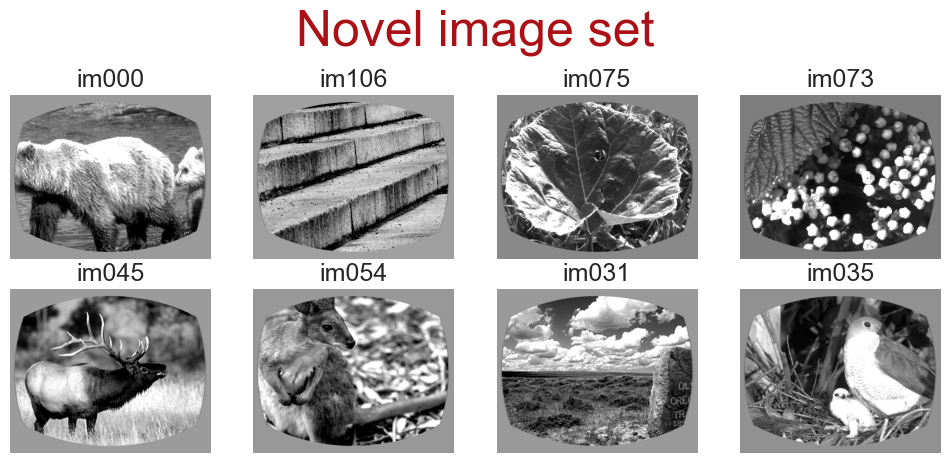

In [349]:
# # for A/B

# # novel 
# novel_experiment_id = platform_experiments[(platform_experiments.project_code=='VisualBehavior')&
#                                            (platform_experiments.experience_level=='Novel 1')].index.values[0]
# dataset = loading.get_ophys_dataset(novel_experiment_id)

# stimulus_templates = dataset.stimulus_templates.copy()

# fig, ax = plt.subplots(2,4,figsize=(10,5))
# ax=ax.ravel()
# for i,image_name in enumerate(np.sort(stimulus_templates.index)):
#     image = stimulus_templates.loc[image_name]['unwarped'].copy()
#     image[np.isnan(image)] = 150
#     ax[i].imshow(image, cmap='gray')
#     ax[i].set_title(image_name,)
#     ax[i].set_xlim(350, 1575)
#     ax[i].set_ylim(100, 1100)
#     ax[i].invert_yaxis()
#     ax[i].axis('off')
    
# # fig.suptitle('Familiar Training Set\nimage set A', color=colors[0])
# fig.suptitle('Novel test set\nimage set B', x=0.5, y=0.94,  color=colors[1], fontsize=36)
# plt.subplots_adjust(hspace=0.4, wspace=0.2)
# fig.tight_layout()

In [340]:
# # for B/A

# # familiar 
# familiar_experiment_id = platform_experiments[(platform_experiments.project_code=='VisualBehaviorTask1B')&
#                                         (platform_experiments.experience_level=='Familiar')].index.values[0]
# dataset = loading.get_ophys_dataset(familiar_experiment_id)

# stimulus_templates = dataset.stimulus_templates.copy()

# fig, ax = plt.subplots(2,4,figsize=(8,5))
# ax=ax.ravel()
# for i,image_name in enumerate(np.sort(stimulus_templates.index)):
#     image = stimulus_templates.loc[image_name]['unwarped'].copy()
#     image[np.isnan(image)] = 150
#     ax[i].imshow(image, cmap='gray')
#     ax[i].set_title(image_name,)
#     ax[i].set_xlim(350, 1575)
#     ax[i].set_ylim(100, 1100)
#     ax[i].invert_yaxis()
#     ax[i].axis('off')
    
# # fig.suptitle('Familiar Training Set\nimage set A', color=colors[0])
# fig.suptitle('Familiar training set\nimage set B', x=0.5, y=0.94,  color=colors[1], fontsize=30)
# plt.subplots_adjust(hspace=0.7, wspace=0.2)
# fig.tight_layout()

In [341]:
# # for A/B

# # novel 
# novel_experiment_id = platform_experiments[(platform_experiments.project_code=='VisualBehaviorTask1B')&
#                                            (platform_experiments.experience_level=='Novel 1')].index.values[0]
# dataset = loading.get_ophys_dataset(novel_experiment_id)

# stimulus_templates = dataset.stimulus_templates.copy()

In [342]:
# fig, ax = plt.subplots(2,4,figsize=(8,5))
# ax=ax.ravel()
# for i,image_name in enumerate(stimulus_templates.index):
#     image = stimulus_templates.loc[image_name]['unwarped'].copy()
#     image[np.isnan(image)] = 150
#     ax[i].imshow(image, cmap='gray')
#     ax[i].set_title(image_name,)
#     ax[i].set_xlim(350, 1575)
#     ax[i].set_ylim(100, 1100)
#     ax[i].invert_yaxis()
#     ax[i].axis('off')
    
# # fig.suptitle('Familiar Training Set\nimage set A', color=colors[0])
# fig.suptitle('Novel test set\nimage set A', x=0.5, y=0.94,  color=colors[0], fontsize=36)
# plt.subplots_adjust(hspace=0.7, wspace=0.2)
# fig.tight_layout()

### Ophys session sequence 

#### Ignoring image set identity - Familiar is always blue

402


C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # ophys sessions 1,2,3 = Familiar
C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # ophys session 4 with no prior exposures to image set = Novel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:title={'center':'Ophys session types'}, xlabel='Session number', ylabel='Mouse number'>

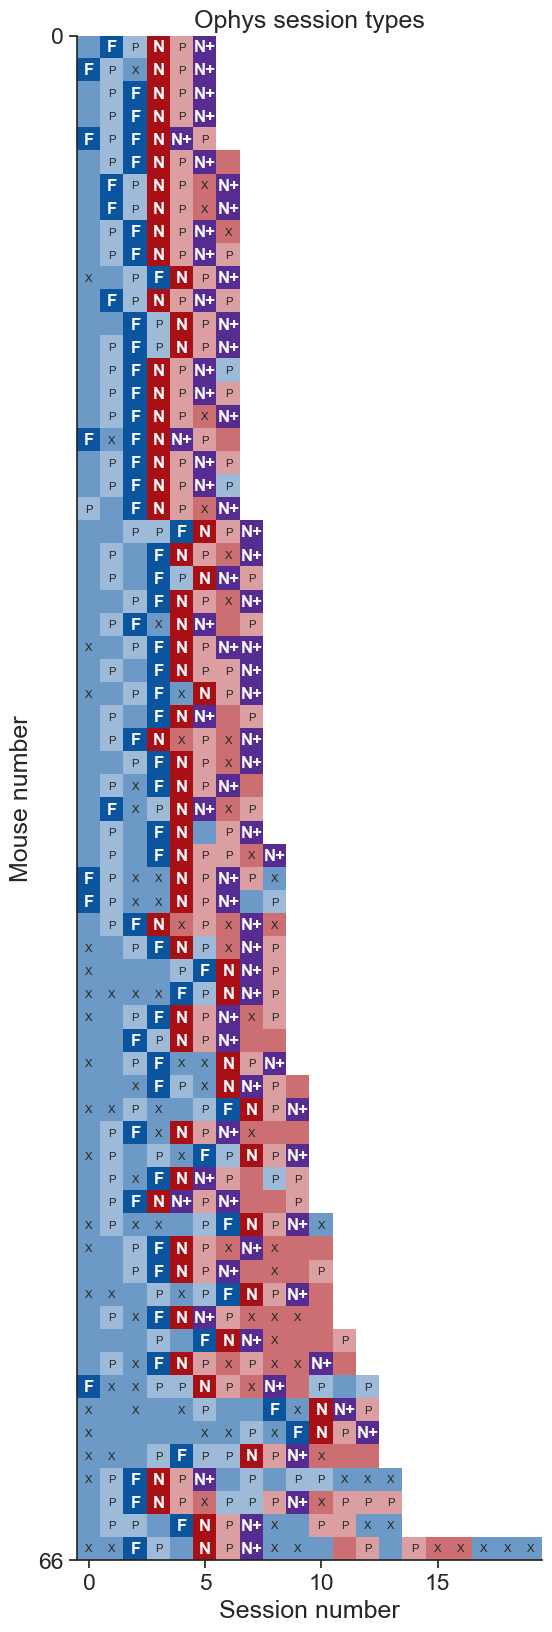

In [525]:
behavior_sessions = utilities.add_ophys_stage_to_behavior_sessions(platform_experiments, behavior_sessions)

color_column = 'ophys_stage'
color_map = utils.get_ophys_stage_color_map(as_rgb=True)

sessions = behavior_sessions.copy()
# exclude non-ophys & habituation sessions, which have ophys_stage = None
sessions = sessions[sessions.ophys_stage!='None']
# exclude mice that are not in platform paper dataset 
sessions = sessions[sessions.mouse_id.isin(platform_experiments.mouse_id.unique())]

ppf.plot_ophys_history_for_mice(sessions, color_column=color_column, color_map=color_map, save_dir=save_dir, suffix='_all_mice')

402


C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # ophys sessions 1,2,3 = Familiar
C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # ophys session 4 with no prior exposures to image set = Novel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:title={'center':'Ophys session types'}, xlabel='Session number', ylabel='Mouse number'>

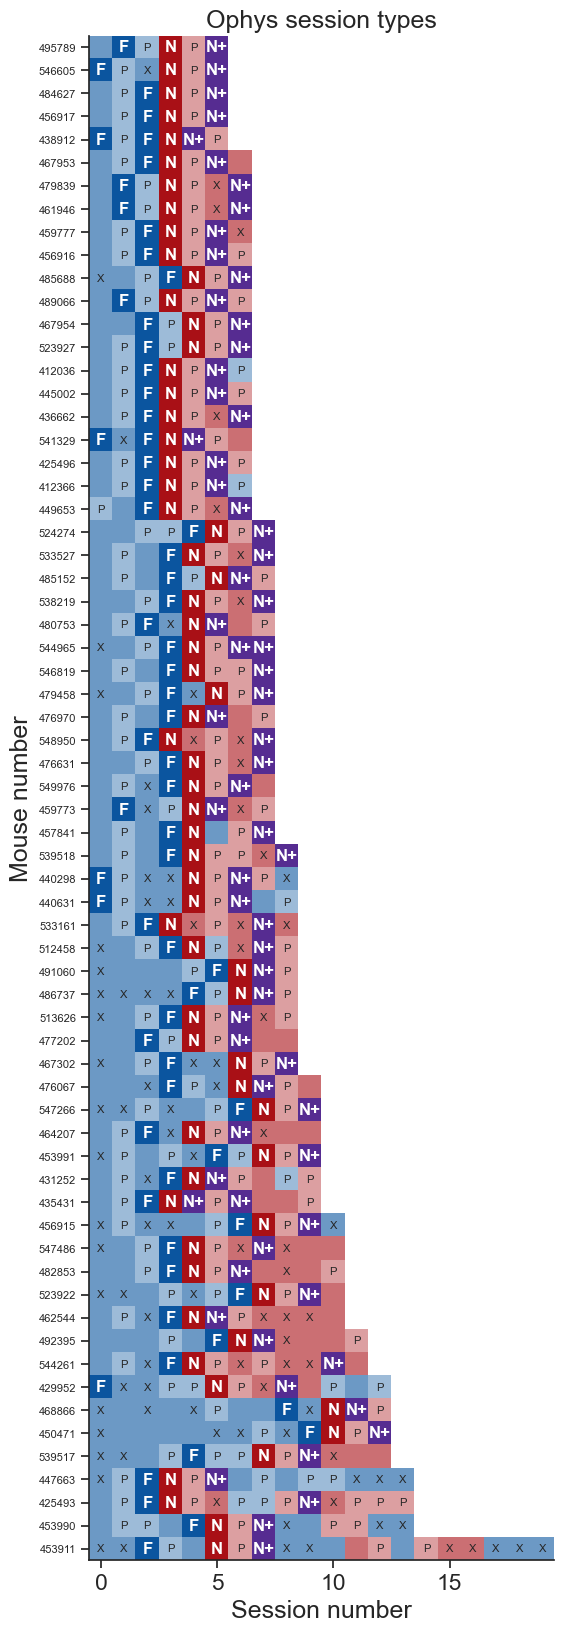

In [526]:
behavior_sessions = utilities.add_ophys_stage_to_behavior_sessions(platform_experiments, behavior_sessions)

color_column = 'ophys_stage'
color_map = utils.get_ophys_stage_color_map(as_rgb=True)

sessions = behavior_sessions.copy()
# exclude non-ophys & habituation sessions, which have ophys_stage = None
sessions = sessions[sessions.ophys_stage!='None']
# exclude mice that are not in platform paper dataset 
sessions = sessions[sessions.mouse_id.isin(platform_experiments.mouse_id.unique())]

ppf.plot_ophys_history_for_mice(sessions, color_column=color_column, color_map=color_map,
group_by_cre=False, label_rows_by_cre=False, label_with_mouse_id=True, save_dir=None, suffix='_with_mouse_ids')


#### For cohorts separately

Categories
* image set A - active
* image set A - passive
* image set A - active, in dataset
<!-- * image set A - failed QC -->
* image set B - active
* image set B - passive
* image set B - active, in dataset
<!-- * image set B - failed QC -->

In [385]:
ab_mice = behavior_sessions[behavior_sessions.project_code.isin(['VisualBehaviorMultiscope', 'VisualBehavior'])].mouse_id.unique()
ba_mice = behavior_sessions[behavior_sessions.project_code.isin(['VisualBehaviorTask1B'])].mouse_id.unique()

402


C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # ophys sessions 1,2,3 = Familiar
C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # ophys session 4 with no prior exposures to image set = Novel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:title={'center':'Cohorts 1 & 2'}, xlabel='Session number', ylabel='Mouse number'>

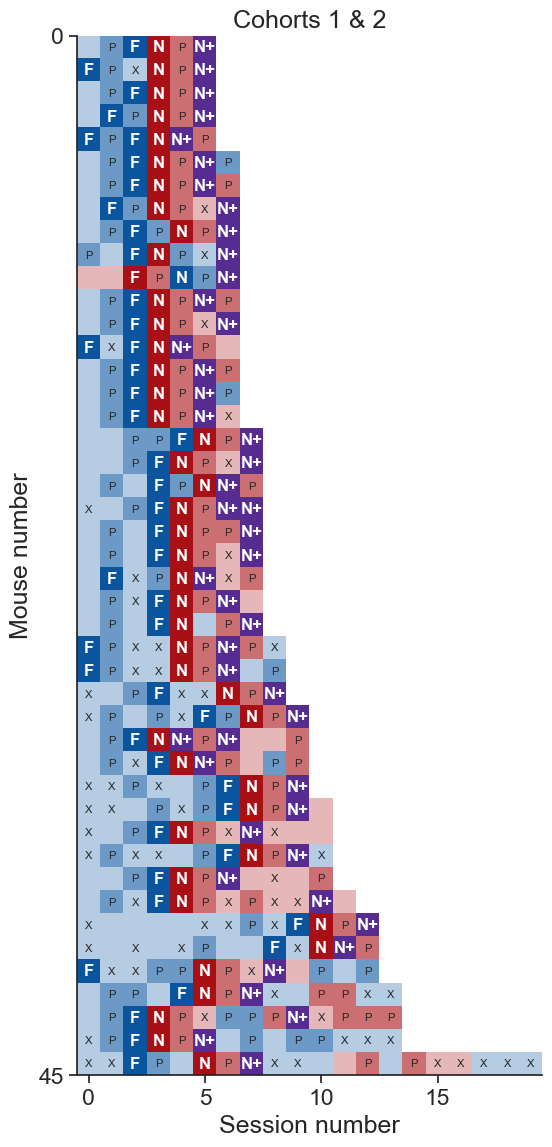

In [530]:
behavior_sessions = utilities.add_ophys_stage_to_behavior_sessions(platform_experiments, behavior_sessions)

color_column = 'stimulus_phase'
color_map = utils.get_stimulus_phase_color_map(as_rgb=True)

sessions = behavior_sessions[behavior_sessions.mouse_id.isin(ab_mice)]
# exclude non-ophys & habituation sessions, which have ophys_stage = None
sessions = sessions[sessions.ophys_stage!='None']
# exclude mice that are not in platform paper dataset 
sessions = sessions[sessions.mouse_id.isin(platform_experiments.mouse_id.unique())]

ppf.plot_ophys_history_for_mice(sessions, color_column=color_column, color_map=color_map, title='Cohorts 1 & 2')

402


C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # ophys sessions 1,2,3 = Familiar
C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\utilities.py:1466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # ophys session 4 with no prior exposures to image set = Novel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:title={'center':'Cohort 3'}, xlabel='Session number', ylabel='Mouse number'>

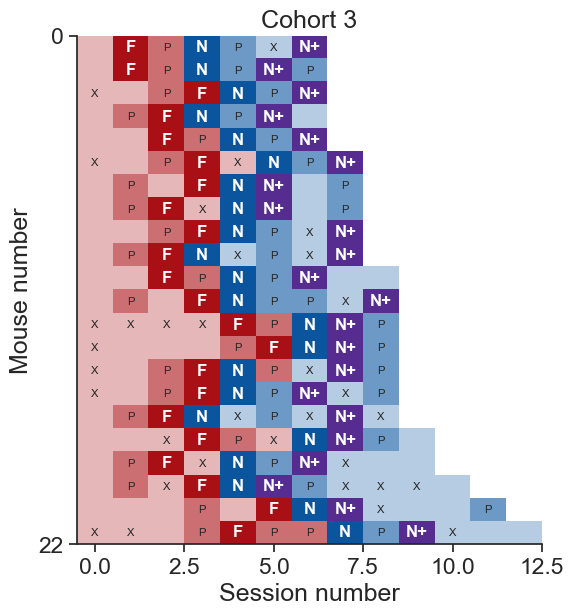

In [531]:
behavior_sessions = utilities.add_ophys_stage_to_behavior_sessions(platform_experiments, behavior_sessions)

color_column = 'stimulus_phase'
color_map = utils.get_stimulus_phase_color_map(as_rgb=True)

sessions = behavior_sessions[behavior_sessions.mouse_id.isin(ba_mice)]
# exclude non-ophys & habituation sessions, which have ophys_stage = None
sessions = sessions[sessions.ophys_stage!='None']
# exclude mice that are not in platform paper dataset 
sessions = sessions[sessions.mouse_id.isin(platform_experiments.mouse_id.unique())]

ppf.plot_ophys_history_for_mice(sessions, color_column=color_column, color_map=color_map, title='Cohort 3')

### Plot response probability heatmaps across image transitions

66 66


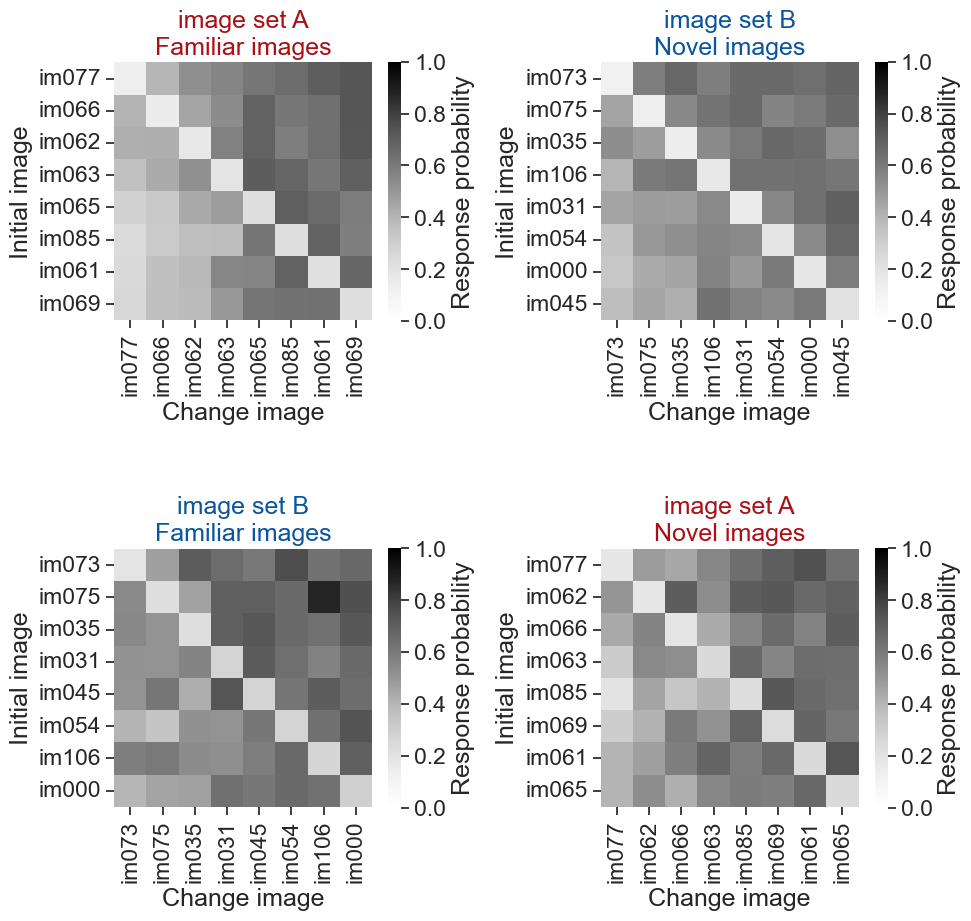

In [624]:
# limits to engaged portion of session when loading response probability values
ppf.plot_response_probability_heatmaps_for_cohorts(behavior_sessions, save_dir=save_dir)

### Sort and plot performance across all image transitions for A-B mice

In [576]:
if 'last_familiar_active' not in behavior_sessions.columns:
    # make fake ophys_container_id column so the below functions will work
    behavior_sessions['ophys_container_id'] = behavior_sessions.mouse_id.values
    # add last familiar and first novel columns
    behavior_sessions = utilities.add_date_string(behavior_sessions)
    behavior_sessions = utilities.add_n_relative_to_first_novel_column(behavior_sessions)
    behavior_sessions = utilities.add_first_novel_column(behavior_sessions)
    behavior_sessions = utilities.add_second_novel_active_column(behavior_sessions)
    behavior_sessions = utilities.add_last_familiar_active_column(behavior_sessions)


In [579]:
def add_image_pair_column(data):
    data = data.reset_index(drop=True)
    data['image_pair'] = [data.iloc[row]['previous_image_name'][2:]+'_'+data.iloc[row]['image_name'][2:] for row in range(len(data))]
    return data

def add_image_pair_index(data, pair_order):
    data['image_pair_index'] = None
    for row in range(len(data)):
        image_pair = data.iloc[row].image_pair
        pairs = list(pair_order)
        index = pairs.index(image_pair)
        data.at[row, 'image_pair_index'] = index
    return data

In [607]:
# gather data
familiar_sessions = behavior_sessions[(behavior_sessions.last_familiar_active==True) &
                                     (behavior_sessions.project_code.isin(['VisualBehavior', 'VisualBehaviorMultiscope']))].index.values
novel_sessions = behavior_sessions[(behavior_sessions.first_novel==True) & 
                                  (behavior_sessions.project_code.isin(['VisualBehavior', 'VisualBehaviorMultiscope']))].index.values
print(len(familiar_sessions), len(novel_sessions))

familiar_data = behavior.aggregate_response_probability_across_sessions(familiar_sessions, engaged_only=engaged_only)
novel_data = behavior.aggregate_response_probability_across_sessions(novel_sessions, engaged_only=engaged_only)

familiar_data = add_image_pair_column(familiar_data)
novel_data = add_image_pair_column(novel_data)

familiar_pair_order = familiar_data.groupby('image_pair').mean()[['response_probability']].sort_values(by='response_probability').index.values
novel_pair_order = novel_data.groupby('image_pair').mean()[['response_probability']].sort_values(by='response_probability').index.values

familiar_data = add_image_pair_index(familiar_data, familiar_pair_order)
novel_data = add_image_pair_index(novel_data, novel_pair_order)

44 44


C:\Users\marinag\AppData\Local\Temp\ipykernel_18940\3676784683.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  familiar_pair_order = familiar_data.groupby('image_pair').mean()[['response_probability']].sort_values(by='response_probability').index.values
C:\Users\marinag\AppData\Local\Temp\ipykernel_18940\3676784683.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  novel_pair_order = novel_data.groupby('image_pair').mean()[['response_probability']].sort_values(by='response_probability').index.values


Text(0, 0.5, 'Response probability')

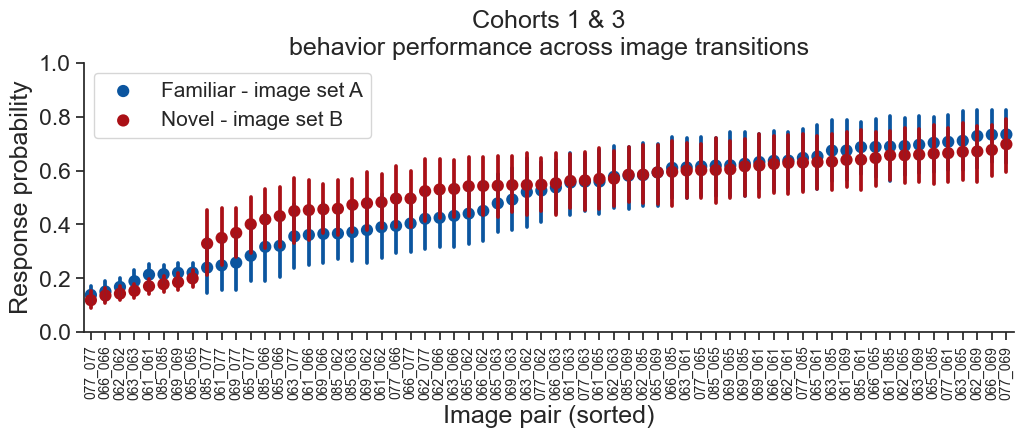

In [608]:
colors = utils.get_colors_for_session_numbers()
colors = [colors[0], colors[3]]

order = np.sort(familiar_data.image_pair_index.unique())

figsize = (12, 3.5)
fig, ax = plt.subplots(figsize=figsize)

familiar_data = familiar_data.sort_values(by='image_pair_index')
order = familiar_data.image_pair_index.unique()
xticklabels = familiar_data.image_pair.unique()

ax = sns.pointplot(data=familiar_data, x='image_pair_index', y='response_probability', order=order, 
                      color=colors[0], label='Familiar - image set A', join=False, ax=ax)
ax = sns.pointplot(data=novel_data, x='image_pair_index', y='response_probability', order=order, 
                      color=colors[1], label='Novel - image set B', join=False, ax=ax)
ax.set_xticklabels(xticklabels, rotation=90, fontsize=10)
ax.set_xlabel('Image pair (sorted)')
ax.set_ylim(0, 1)
ax.legend(loc='upper left', fontsize='small')
ax.set_title('Cohorts 1 & 3\nbehavior performance across image transitions')
ax.set_ylabel('Response probability')

#### whats up with the images in the range where familiar is lower than novel? 

In [589]:
low_perf_images = familiar_data[familiar_data.image_pair_index.isin(np.arange(8,32))].image_name.unique()

In [590]:
familiar_experiment_id = platform_experiments[platform_experiments.behavior_session_id==familiar_data.behavior_session_id.values[0]].index.values[0]
dataset = loading.get_ophys_dataset(familiar_experiment_id)

c:\users\marinag\documents\code\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


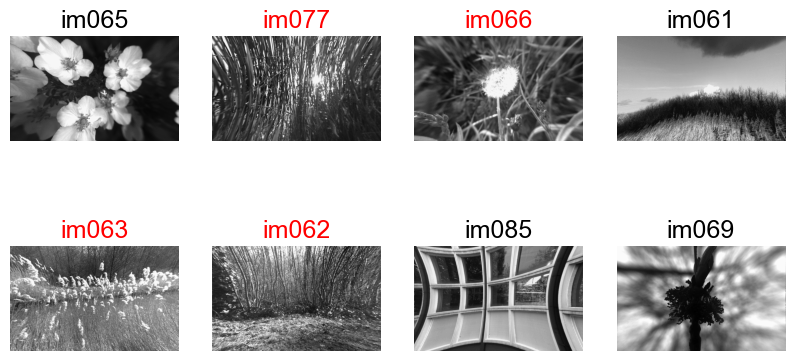

In [591]:
stimulus_templates = dataset.stimulus_templates.copy()
fig, ax = plt.subplots(2,4,figsize=(10,5))
ax=ax.ravel()
for i,image_name in enumerate(stimulus_templates.index):
    ax[i].imshow(stimulus_templates.loc[image_name]['warped'], cmap='gray')
    if image_name in low_perf_images:
        color='r'
    else:
        color='k'
    ax[i].set_title(image_name, color=color)
    ax[i].axis('off')

These are generally the high spatial frequency images...

### which novel images are in the same range in the ordered set?

In [592]:
novel_low_perf_images = novel_data[novel_data.image_pair_index.isin(np.arange(8,32))].image_name.unique()

In [593]:
novel_experiment_id = platform_experiments[platform_experiments.behavior_session_id==novel_data.behavior_session_id.values[0]].index.values[0]
dataset = loading.get_ophys_dataset(novel_experiment_id)

c:\users\marinag\documents\code\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


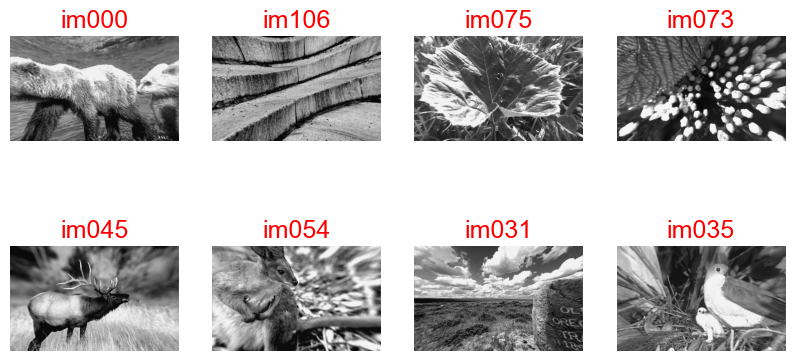

In [594]:
stimulus_templates = dataset.stimulus_templates.copy()
fig, ax = plt.subplots(2,4,figsize=(10,5))
ax=ax.ravel()
for i,image_name in enumerate(stimulus_templates.index):
    ax[i].imshow(stimulus_templates.loc[image_name]['warped'], cmap='gray')
    if image_name in novel_low_perf_images:
        color='r'
    else:
        color='k'
    ax[i].set_title(image_name, color=color)
    ax[i].axis('off')

In [595]:
novel_low_perf_images

array(['im073', 'im106', 'im075', 'im031', 'im035', 'im000', 'im054',
       'im045'], dtype=object)

In [596]:
# does it matter what image it changed from?
novel_data[novel_data.image_pair_index.isin(np.arange(8,32))].previous_image_name.unique()

array(['im106', 'im075', 'im031', 'im035', 'im000', 'im054', 'im045'],
      dtype=object)

In [597]:
np.sort(novel_data[novel_data.image_pair_index.isin(np.arange(8,32))].image_pair.unique())

array(['000_031', '000_035', '000_073', '000_075', '031_035', '031_073',
       '031_075', '031_106', '035_045', '035_073', '035_075', '035_106',
       '045_035', '045_054', '045_073', '045_075', '054_000', '054_031',
       '054_035', '054_073', '054_075', '075_035', '075_073', '106_073'],
      dtype=object)

### repeat for B-A mice

In [605]:
familiar_sessions = behavior_sessions[(behavior_sessions.last_familiar_active==True) &
                                     (behavior_sessions.project_code.isin(['VisualBehaviorTask1B']))].index.values
novel_sessions = behavior_sessions[(behavior_sessions.first_novel==True) & 
                                  (behavior_sessions.project_code.isin(['VisualBehaviorTask1B']))].index.values
print(len(familiar_sessions), len(novel_sessions))

familiar_data = behavior.aggregate_response_probability_across_sessions(familiar_sessions, engaged_only=engaged_only)
novel_data = behavior.aggregate_response_probability_across_sessions(novel_sessions, engaged_only=engaged_only)

familiar_data = add_image_pair_column(familiar_data)
novel_data = add_image_pair_column(novel_data)

familiar_pair_order = familiar_data.groupby('image_pair').mean()[['response_probability']].sort_values(by='response_probability').index.values
novel_pair_order = novel_data.groupby('image_pair').mean()[['response_probability']].sort_values(by='response_probability').index.values

familiar_data = add_image_pair_index(familiar_data, familiar_pair_order)
novel_data = add_image_pair_index(novel_data, novel_pair_order)

22 22


C:\Users\marinag\AppData\Local\Temp\ipykernel_18940\2600042533.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  familiar_pair_order = familiar_data.groupby('image_pair').mean()[['response_probability']].sort_values(by='response_probability').index.values
C:\Users\marinag\AppData\Local\Temp\ipykernel_18940\2600042533.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  novel_pair_order = novel_data.groupby('image_pair').mean()[['response_probability']].sort_values(by='response_probability').index.values


Text(0, 0.5, 'Response probability')

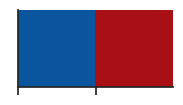

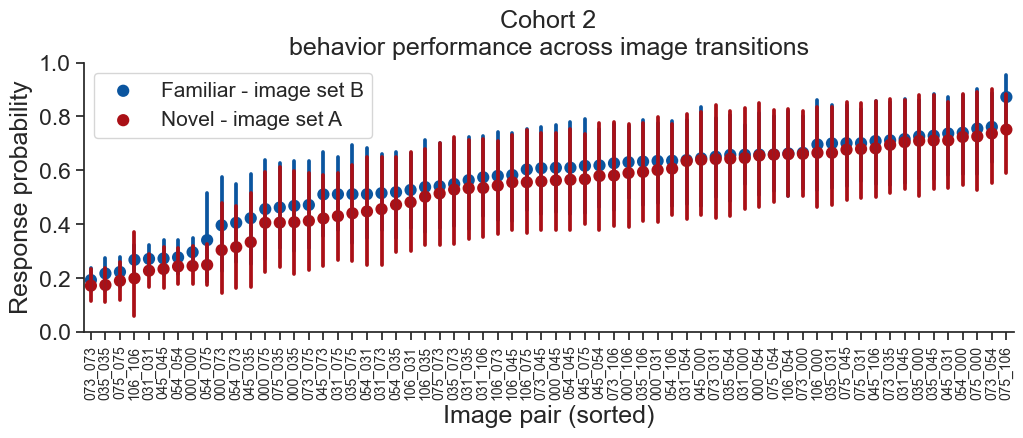

In [606]:
colors = utils.get_colors_for_session_numbers()
colors = [colors[0], colors[3]]
sns.palplot(colors)

familiar_data = familiar_data.sort_values(by='image_pair_index')
order = familiar_data.image_pair_index.unique()
xticklabels = familiar_data.image_pair.unique()

figsize = (12, 3.5)
fig, ax = plt.subplots(figsize=figsize)


ax = sns.pointplot(data=familiar_data, x='image_pair_index', y='response_probability', order=order, 
                      color=colors[0], label='Familiar - image set B', join=False, ax=ax)
ax = sns.pointplot(data=novel_data, x='image_pair_index', y='response_probability', order=order, 
                      color=colors[1], label='Novel - image set A', join=False, ax=ax)
ax.set_xticklabels(xticklabels, rotation=90, fontsize=10)
ax.set_xlabel('Image pair (sorted)')
ax.set_ylim(0, 1)
ax.legend(loc='upper left', fontsize='small')
ax.set_title('Cohort 2\nbehavior performance across image transitions')
ax.set_ylabel('Response probability')

Difference isnt as bad, but it does indicate that image set A (which is Novel here, i.e. blue) does have images that are simply harder to detect

#### is it the same set of images that are harder to detect for image set A (Novel set in this case)?

C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\hdmf\spec\namespace.py:533: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.3.0 because version 1.5.0 is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))


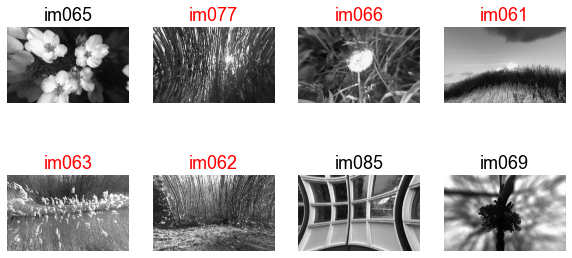

In [ ]:
low_perf_images = novel_data[novel_data.image_pair_index.isin(np.arange(8,22))].image_name.unique()

novel_experiment_id = platform_experiments[platform_experiments.behavior_session_id==novel_data.behavior_session_id.values[0]].index.values[0]
dataset = loading.get_ophys_dataset(familiar_experiment_id)

stimulus_templates = dataset.stimulus_templates.copy()
fig, ax = plt.subplots(2,4,figsize=(10,5))
ax=ax.ravel()
for i,image_name in enumerate(stimulus_templates.index):
    ax[i].imshow(stimulus_templates.loc[image_name]['warped'], cmap='gray')
    if image_name in low_perf_images:
        color='r'
    else:
        color='k'
    ax[i].set_title(image_name, color=color)
    ax[i].axis('off')